# Supply Points (Case dell'Acqua) Data Preprocessing

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Paths

In [ ]:
root_folder_path = "/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/SafeCREW/soft_sensors/Soft Sensor CS2Milan"
grab_samples_supply_points_path = os.path.join(
    root_folder_path,
    "Case dell'acqua - Grab Samples (main)/0. Case acqua - 2010-2023.xlsx",
)
all_grab_samples_path = os.path.join(
    root_folder_path, "Tutti punti - Grab Samples"
)
sensor_data_folder_path = os.path.join(
    root_folder_path, "Case dell'acqua - Sensori"
)

## Collect all grab samples for Supply Points

### Get Name and ID of Supply Points

In [ ]:
column_list = "CS, CT"

meta_supply_points_df = pd.read_excel(
    grab_samples_supply_points_path, usecols=column_list, header=4
)

In [ ]:
meta_supply_points_df

### Load all grab samples

In [ ]:
column_list = [
    "Data di prelievo",
    "Rapporto di prova",
    "Punto di prelievo",
    "Codice punto di prelievo",
    "Campagna",
    "Analisi programmate",
    "ZONA",
    "Alcalinità (mg/L)",
    "Alcalinità equivalente a carbonati (mg/L di CO3)",
    "Alcalinità equivalente a idrossidi (mg/L di OH)",
    "Bicarbonati (mg/L)",
    "Torbidità (NTu)",
    "Colore (Cu)",
    "Conduttività a 20°C (µS/cm)",
    "Concentrazione ioni idrogeno (unità pH)",
    "Durezza (da calcolo) (°F)",
    "Durezza totale (°F)",
    "Indice di aggressività ottenuto per calcolo (no unità)",
    "Residuo secco a 180°C (mg/L)",
    "Solidi sospesi totali (mg/L)",
    "Cloro residuo libero (mg/L di Cl2)",
    "Cloro residuo libero (al prelievo) (mg/L di Cl2)",
    "Concentr. ioni idrogeno (al prelievo) (unità pH)",
    "Temperatura - °C",
    "Temperatura (al prelievo) (°C)",
    "Temperatura (°C)",
    "TOC - carbonio organico totale (mg/L di C)",
    "Cloroformio (µg/L)",
    "Bromodiclorometano (µg/L)",
    "Dibromoclorometano (µg/L)",
    "Bromoformio (µg/L)",
    "Sommatoria totale trialometani (µg/L)",
    "Conta delle colonie a 22°C (UFC/mL)",
    "Conteggio colonie a 30°C (UFC/mL)",
    "Conta delle colonie a 37°C (UFC/mL)",
    "Batteri coliformi a 37°C (MPN/100 mL)",
    "Enterococchi (MPN/100 mL)",
    "Escherichia coli (MPN/100 mL)",
    "Pseudomonas aeruginosa (UFC/250 mL)",
    "Pseudomonas aeruginosa (UFC/100 mL)",
    "Legionella spp (UFC/L)",
    "Legionella pneumophila (UFC/L)",
    "Legionella molecolare pneumophila",
    "Legionella molecolare spp",
]

In [ ]:
grab_samples = []

for file in os.listdir(all_grab_samples_path):
    if file.endswith(".xlsx"):
        df = pd.read_excel(os.path.join(all_grab_samples_path, file), header=11)
    else:
        df = pd.read_excel(os.path.join(all_grab_samples_path, file), header=15)
    common_cols = list(set(df.columns) & set(column_list))
    df = df[common_cols]
    grab_samples.append(df)

grab_samples_df = pd.concat(grab_samples)

### Get Supply Points Grab Samples

In [ ]:
supply_points_df = grab_samples_df.merge(
    meta_supply_points_df,
    left_on="Codice punto di prelievo",
    right_on="filtro 2",
    how="left",
)

In [ ]:
# supply_points_df.drop(columns=["filtro 1", "filtro 2"], inplace=True)
supply_points_df.drop_duplicates(inplace=True)

In [ ]:
# combine the different Temperature columns into one column by mantaining the positions without deleting the nans and drop the others
supply_points_df["Temperatura °C"] = supply_points_df["Temperatura (°C)"]

for col in ["Temperatura - °C", "Temperatura (al prelievo) (°C)"]:
    supply_points_df["Temperatura °C"] = supply_points_df[
        "Temperatura °C"
    ].combine_first(supply_points_df[col])

supply_points_df.drop(
    columns=[
        "Temperatura - °C",
        "Temperatura (al prelievo) (°C)",
        "Temperatura (°C)",
    ],
    inplace=True,
)

In [ ]:
supply_points_df = supply_points_df[
    (
        supply_points_df["filtro 1"].notna()
        | supply_points_df["filtro 2"].notna()
    )
]

In [ ]:
supply_points_df.to_excel(
    "/Users/massimilianoarca/Documents/SafeCREW/Soft Sensors data/Milano/All supply points.xlsx",
    index=False,
)

In [ ]:
supply_points_df

In [ ]:
columns_list = "A:G, M:Y, BY, BZ:CB, CD, CF, CJ, CL:CM"

In [145]:
raw_grab_samples_df = pd.read_excel(
    grab_samples_supply_points_path, header=4, usecols=columns_list
)

In [146]:
def convert_to_float(x):
    try:
        if x == "3,0":
            pass
        return float(x.replace(",", ".")) if type(x) == str and "," in x else x
    except ValueError:
        return x

In [147]:
raw_grab_samples_df["Carica batterica a 22°C (UFC/mL)"] = raw_grab_samples_df[
    "Carica batterica a 22°C (UFC/mL)"
].apply(convert_to_float)

In [164]:
raw_grab_samples_df["Codice punto di prelievo"] = raw_grab_samples_df["Codice punto di prelievo"].str.strip()

In [148]:
raw_grab_samples_df

,Data di prelievo,Rapporto di prova,Punto di prelievo,Codice punto di prelievo,Campagna,Analisi programmate,ZONA,Alcalinità (mg/L),Cloro residuo libero (mg/L di Cl2),Colore (CU),...,Bicarbonati - mg/L,TOC - carbonio organico totale (mg/L di C),Carica batterica a 22°C (UFC/mL),Conteggio colonie a 30°C (UFC/mL),Carica batterica a 37°C (UFC/mL),Batteri coliformi a 37°C (MPN / 100 mL),Enterococchi (MPN / 100mL),Escherichia Coli (MPN / 100mL),Pseudomonas aeruginosa (UFC / 250mL),Pseudomonas aeruginosa (UFC/100 mL)
0,2014-07-18,3185/14,C.A. ingresso Menotti > U.di Nemi,ING_UCCNEMI,CASA_ACQUA,Analisi case dell'acqua,Case acqua,153.07,0.06,<0.01,...,NaN,NaN,342,NaN,845,1,0,0,1,NaN
1,2016-06-13,2818/16,Casa Acqua Appennini con CO2,SII00801,UTENZA,"CBT 22° e 37°, Coliformi, E-Coli, Enterococchi...",case acqua,95,0.01,0.77,...,94.0,NaN,<1,NaN,<1,<1,<1,<1,NaN,NaN
2,2014-01-03,16/14,Casa Acqua Lessona,SII00659,MICRO_PS,"Coliformi, E-Coli, Enterococchi, Pseudomonas",Case acqua,NaN,0.05,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
3,2016-04-22,1860/16,Casa Acqua Lessona,SII00659,MICR_UT_PS,"CBT 22° e 37°, Coliformi, E-Coli, Enterococchi...",case acqua,NaN,0.03,NaN,...,NaN,NaN,2,NaN,<1,<1,<1,<1,<1,NaN
4,2016-06-13,2819/16,Casa Acqua Via Appennini non trattata,SII00802,UTENZA,"CBT 22° e 37°, Coliformi, E-Coli, Enterococchi...",case acqua,122,0.02,0.77,...,122.0,NaN,<1,NaN,<1,<1,<1,<1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2023-03-29,1554/23,Casa dell'acqua Piazza Scolari,HOUSE_SCOLARI,DKR,Casa Dkr,Case Acqua,NaN,NaN,NaN,...,NaN,NaN,< 1,NaN,NaN,0,0,0,< 1,NaN
2264,2023-03-30,1573/23,V.le Omero-NT-CA21,HOUSE_OME1,PROACQUA,Case Proacqua,Case Acqua,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2265,2023-03-30,1574/23,Menotti > U.di Nemi-NT-CA08,HOUSE_UCC1,PROACQUA,Case Proacqua,Case Acqua,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2266,2023-03-30,1575/23,Casa dell'acqua Piazza Ovidio,HOUSE_OVIDIO,DKR,Casa Dkr,Case Acqua,NaN,NaN,NaN,...,NaN,NaN,< 1,NaN,NaN,0,0,0,<1,NaN


In [149]:
raw_grab_samples_df["Punto di prelievo"].unique()

array(['C.A. ingresso Menotti > U.di Nemi',
       'Casa Acqua Appennini con CO2', 'Casa Acqua Lessona',
       'Casa Acqua Via Appennini non trattata',
       'Casa Acqua Via Omero< Barabinino non trattata',
       'Casa Acqua Via Omero< Barabino',
       'Casa Acqua Via Omero< Barabino con CO2',
       "Casa dell'acqua Castello Sforzesco - naturale",
       "Casa dell'acqua Castello Sforzesco - naturale bis",
       'Idrante Via Mazzolari', 'Ingresso casa acqua Castello Sforzesco',
       'Ingresso casa acqua L.go Tel Aviv',
       'Ingresso Casa Acqua Via Appennini 129',
       "L.go Marinai d'Italia - acqua non trattata",
       "L.go Marinai d'Italia -cqua con CO2",
       'L.go Tel Aviv - acqua con CO2',
       'L.go Tel Aviv - acqua non trattata',
       'Menotti > U.di Nemi - acqua con CO2',
       'Menotti > U.di Nemi - acqua non trattata',
       'Palazzo Marino - frizzante 2° piano',
       'Parco delle Cave - acqua con CO2',
       'Parco delle Cave - acqua non trattata',
 

In [150]:
def count_values(series):
    num_nans = series.isna().sum()
    strings = series[
        series.astype(str).str.contains("|".join(["<", "\*", ">", "[a-zA-Z]"]))
    ].count()
    num_numbers = series[
        series.apply(lambda x: isinstance(x, (int, float)))
    ].count()
    return pd.Series(
        [num_nans, strings, num_numbers], index=["NaN", "Strings", "numbers"]
    )

<>:4: SyntaxWarning: invalid escape sequence '\*'
<>:4: SyntaxWarning: invalid escape sequence '\*'
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_50515/827278286.py:4: SyntaxWarning: invalid escape sequence '\*'
  series.astype(str).str.contains("|".join(["<", "\*", ">", "[a-zA-Z]"]))


In [151]:
columns = raw_grab_samples_df.columns[7:]

In [152]:
histogram = raw_grab_samples_df[columns].apply(count_values)

In [153]:
histogram.loc["Total"] = histogram.sum()

In [154]:
histogram

,Alcalinità (mg/L),Cloro residuo libero (mg/L di Cl2),Colore (CU),Conduttività a 20°C (µS/cm),Concentrazione ioni idrogeno (unità pH),Concentr. ioni idrogeno al prelievo (unità pH),Durezza totale (°F),Indice di aggressività ottenuo per calcolo (no unità),Residuo secco a 180°C (mg/L),Solidi sospesi totali (mg/L),...,Bicarbonati - mg/L,TOC - carbonio organico totale (mg/L di C),Carica batterica a 22°C (UFC/mL),Conteggio colonie a 30°C (UFC/mL),Carica batterica a 37°C (UFC/mL),Batteri coliformi a 37°C (MPN / 100 mL),Enterococchi (MPN / 100mL),Escherichia Coli (MPN / 100mL),Pseudomonas aeruginosa (UFC / 250mL),Pseudomonas aeruginosa (UFC/100 mL)
NaN,1800,1262,1360,1136,1602,1151,633,1337,1132,2268,...,1614,2021,773,2268,1139,762,984,782,1491,1633
Strings,5,512,388,0,57,0,2,47,0,0,...,0,4,324,0,153,183,176,178,374,187
numbers,463,494,520,1132,609,1117,1633,884,1136,0,...,654,243,1171,0,976,1323,1108,1308,403,448
Total,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,...,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268


In [ ]:
ax = histogram.T[["NaN", "Strings", "numbers"]].plot.bar(figsize=(30, 10))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.02))

In [ ]:
plt.style.use("ggplot")

for column in columns:
    plt.figure(figsize=(20, 10))
    hist = raw_grab_samples_df[column].where(
        raw_grab_samples_df[column].apply(lambda x: isinstance(x, (int, float)))
    )
    count, bins, patches = plt.hist(
        hist.dropna(), bins=30, edgecolor="black", linewidth=1.2
    )
    plt.title(
        column
        + " - Count: "
        + str(hist.count())
        + " / "
        + str(raw_grab_samples_df.shape[0])
    )
    plt.ylabel("Frequency")

    # Set x-ticks to bin edges and x-tick labels to intervals
    plt.xticks(
        bins[:-1],
        [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)],
        rotation="vertical",
        fontsize=8,
    )

    # Add count for every bar
    for p in patches:
        plt.annotate(
            str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.02)
        )

In [155]:
houses_code_path = "/Users/massimilianoarca/Documents/SafeCREW/Soft Sensors data/Milano/Case-Codici.xlsx"

In [156]:
houses_code_df = pd.read_excel(houses_code_path)

In [157]:
houses_code_df["Casa dell'acqua"][7] = houses_code_df["Casa dell'acqua"][
    7
].rstrip()

In [158]:
houses_code_df.loc[4] = ["Chiostergi", "HOUSE_CHIOSTERGI"]

In [159]:
houses_code_df

,Casa dell'acqua,Codice Punto di Prelievo
0,Bande Nere,HOUSE_BANDENERE
1,Berna,HOUSE_BERNA
2,Cascia,HOUSE_S_RITA
3,Cermenate,HOUSE_CERMENATE
4,Chiostergi,HOUSE_CHIOSTERGI
5,Civitavecchia,HOUSE_CIVITAVECCHIA
6,Cuoco,HOUSE_CUOCO
7,Fortunato,HOUSE_FORTUNATO
8,Gasparri,HOUSE_GASPARRI
9,Gramsci,HOUSE_GRAMSCI


In [168]:
# keep just rows of raw_grab_samples_df that have a Codice punto di prelievo that is contained in the houses_code_df Codice Punto di Prelievo
grab_samples_df = raw_grab_samples_df.merge(
    houses_code_df,
    left_on="Codice punto di prelievo",
    right_on="Codice Punto di Prelievo",
    how="inner",
)

grab_samples_df.drop(columns=["Casa dell\'acqua", "Codice Punto di Prelievo"], inplace=True)

In [169]:
grab_samples_df

,Data di prelievo,Rapporto di prova,Punto di prelievo,Codice punto di prelievo,Campagna,Analisi programmate,ZONA,Alcalinità (mg/L),Cloro residuo libero (mg/L di Cl2),Colore (CU),...,Bicarbonati - mg/L,TOC - carbonio organico totale (mg/L di C),Carica batterica a 22°C (UFC/mL),Conteggio colonie a 30°C (UFC/mL),Carica batterica a 37°C (UFC/mL),Batteri coliformi a 37°C (MPN / 100 mL),Enterococchi (MPN / 100mL),Escherichia Coli (MPN / 100mL),Pseudomonas aeruginosa (UFC / 250mL),Pseudomonas aeruginosa (UFC/100 mL)
0,2021-04-12,1331/21,Casa dell'acqua piazza Cardinale Pietro Gasparri,HOUSE_GASPARRI,CASA_ACQUA,Casa Acqua,Case acqua,NaN,<0.04,NaN,...,NaN,NaN,< 1,NaN,NaN,0,0,0,NaN,< 1
1,2021-07-06,2350/21,Casa dell'acqua piazza Cardinale Pietro Gasparri,HOUSE_GASPARRI,DKR,Casa Dkr,Case acqua,NaN,NaN,NaN,...,NaN,NaN,13,NaN,NaN,0,0,0,NaN,< 1
2,2021-09-16,3324/21,Casa dell'acqua piazza Cardinale Pietro Gasparri,HOUSE_GASPARRI,DKR,Casa Dkr,Case acqua,NaN,NaN,NaN,...,NaN,NaN,38,NaN,NaN,0,0,0,NaN,<1
3,2021-10-13,3638/21,Casa dell'acqua piazza Cardinale Pietro Gasparri,HOUSE_GASPARRI,DKR,Casa Dkr,Case acqua,NaN,NaN,NaN,...,NaN,NaN,<1,NaN,NaN,0,0,0,NaN,<1
4,2022-01-25,245/22,Casa dell'acqua piazza Cardinale Pietro Gasparri,HOUSE_GASPARRI,DKR,Casa Dkr,Case Acqua,NaN,NaN,NaN,...,NaN,0.29,< 1,NaN,NaN,0,0,0,<1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2022-08-01,2609/22,Casa dell'acqua Piazzale Cuoco,HOUSE_CUOCO,DKR,Casa Dkr,Case Acqua,NaN,NaN,NaN,...,NaN,0.11,18,NaN,NaN,0,0,0,<1,NaN
124,2022-09-29,3179/22,Casa dell'acqua Piazzale Cuoco,HOUSE_CUOCO,DKR,Casa Dkr,Case Acqua,NaN,NaN,NaN,...,NaN,0.2,18,NaN,NaN,0,0,0,<1,NaN
125,2022-12-13,3999/22,Casa dell'acqua Piazzale Cuoco,HOUSE_CUOCO,DKR,Casa Dkr,Case Acqua,NaN,NaN,NaN,...,NaN,0.2,71,NaN,NaN,0,0,0,<1,NaN
126,2023-01-09,113/23,Casa dell'acqua Piazzale Cuoco,HOUSE_CUOCO,DKR,Casa Dkr,Case Acqua,NaN,NaN,NaN,...,NaN,NaN,< 1,NaN,NaN,0,0,0,<1,NaN


In [170]:
histogram = grab_samples_df[columns].apply(count_values)

In [171]:
histogram.loc["Total"] = histogram.sum()

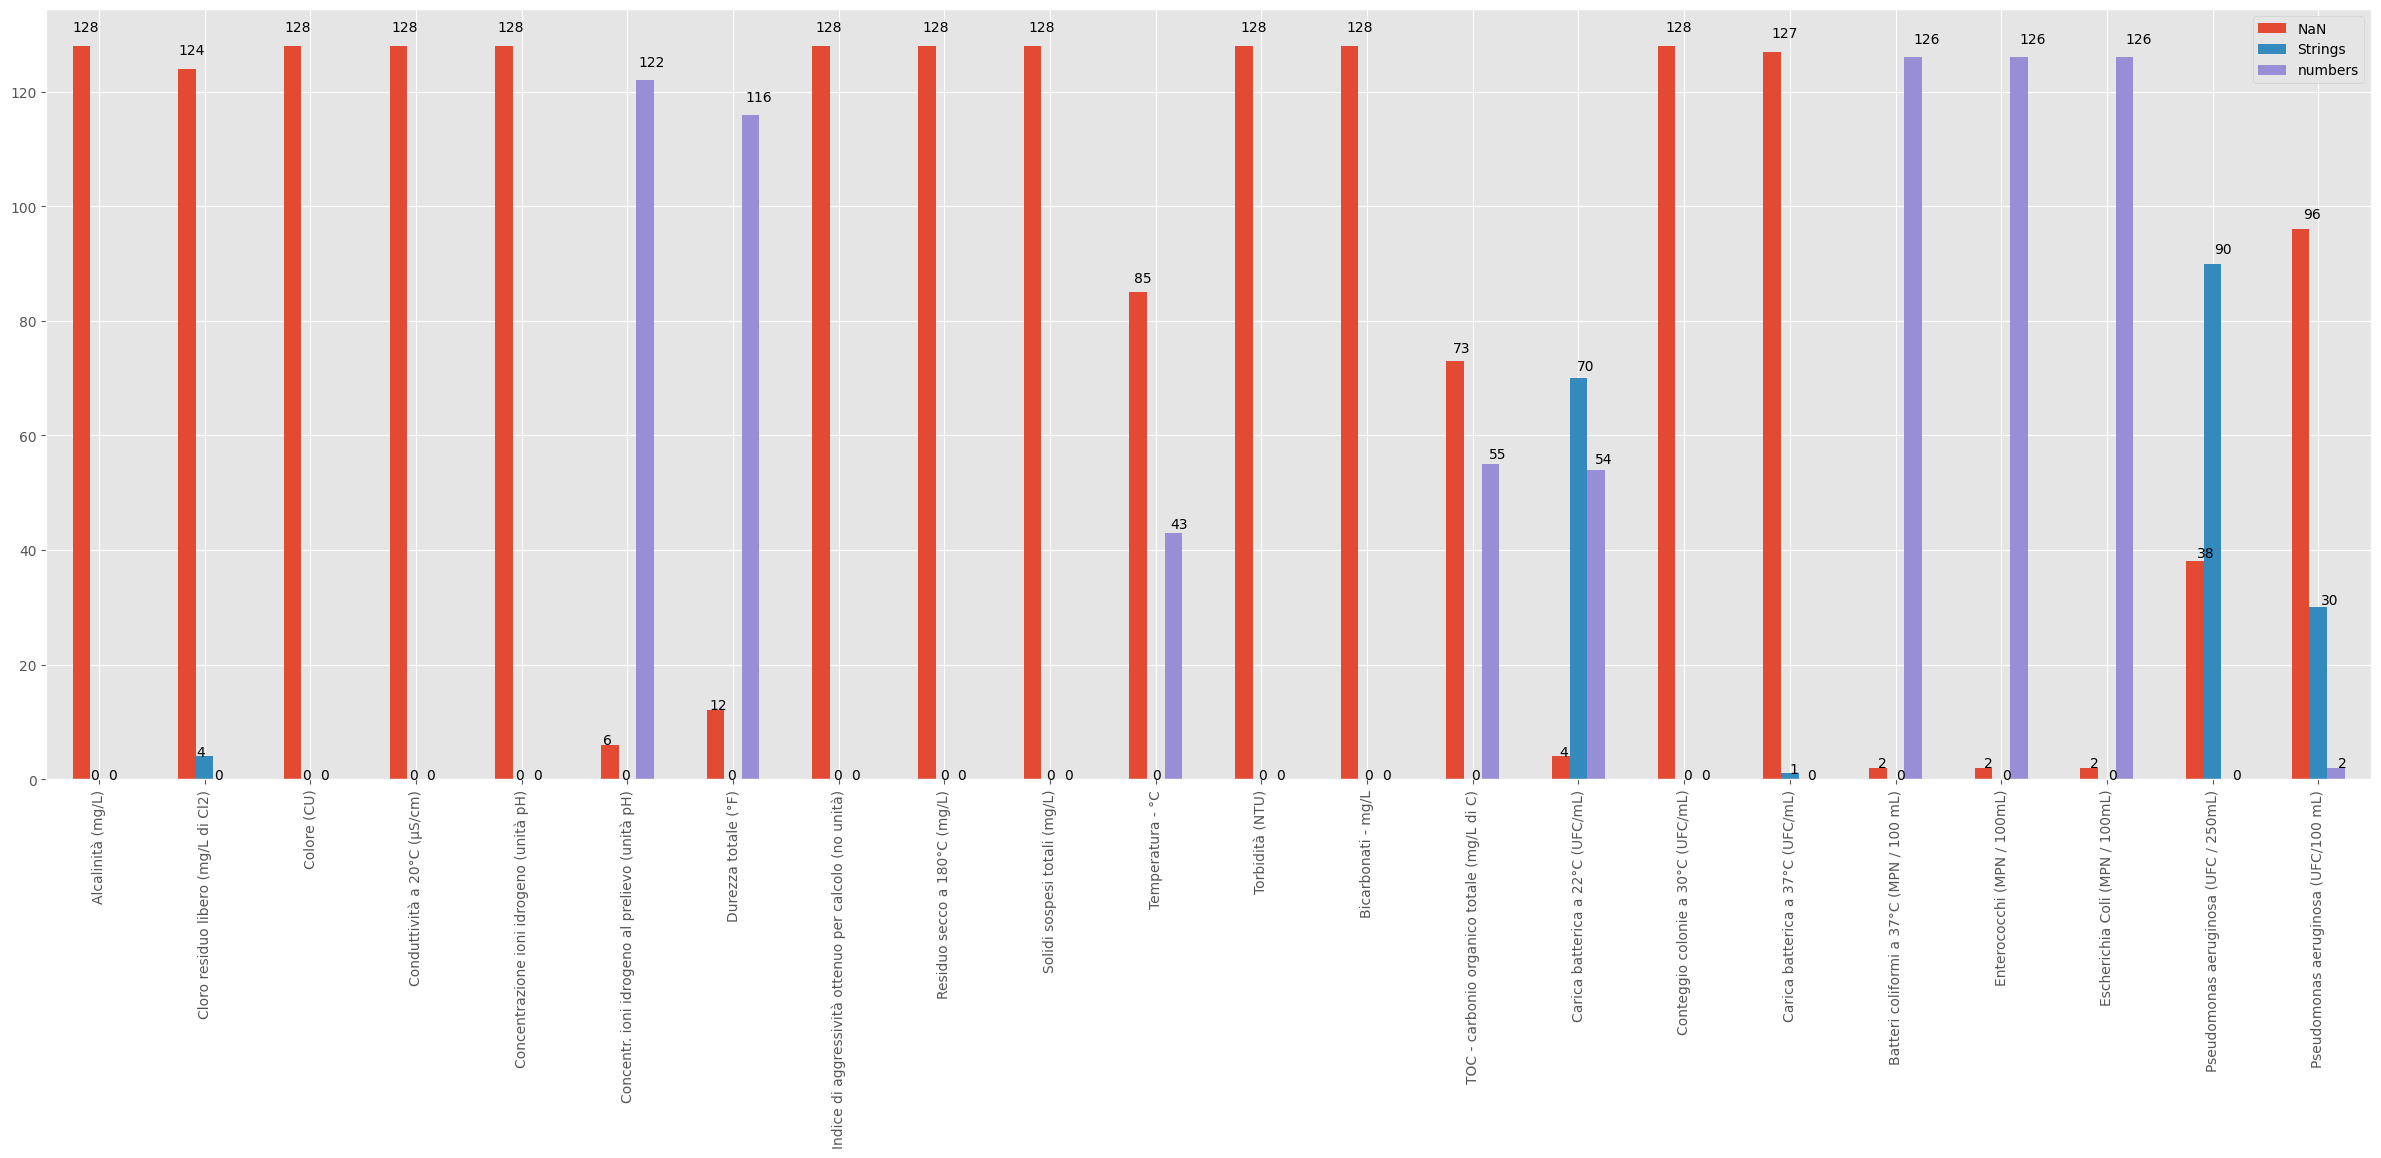

In [174]:
ax = histogram.T[["NaN", "Strings", "numbers"]].plot.bar(figsize=(30, 10))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.02))

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_50515/220598675.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 10))


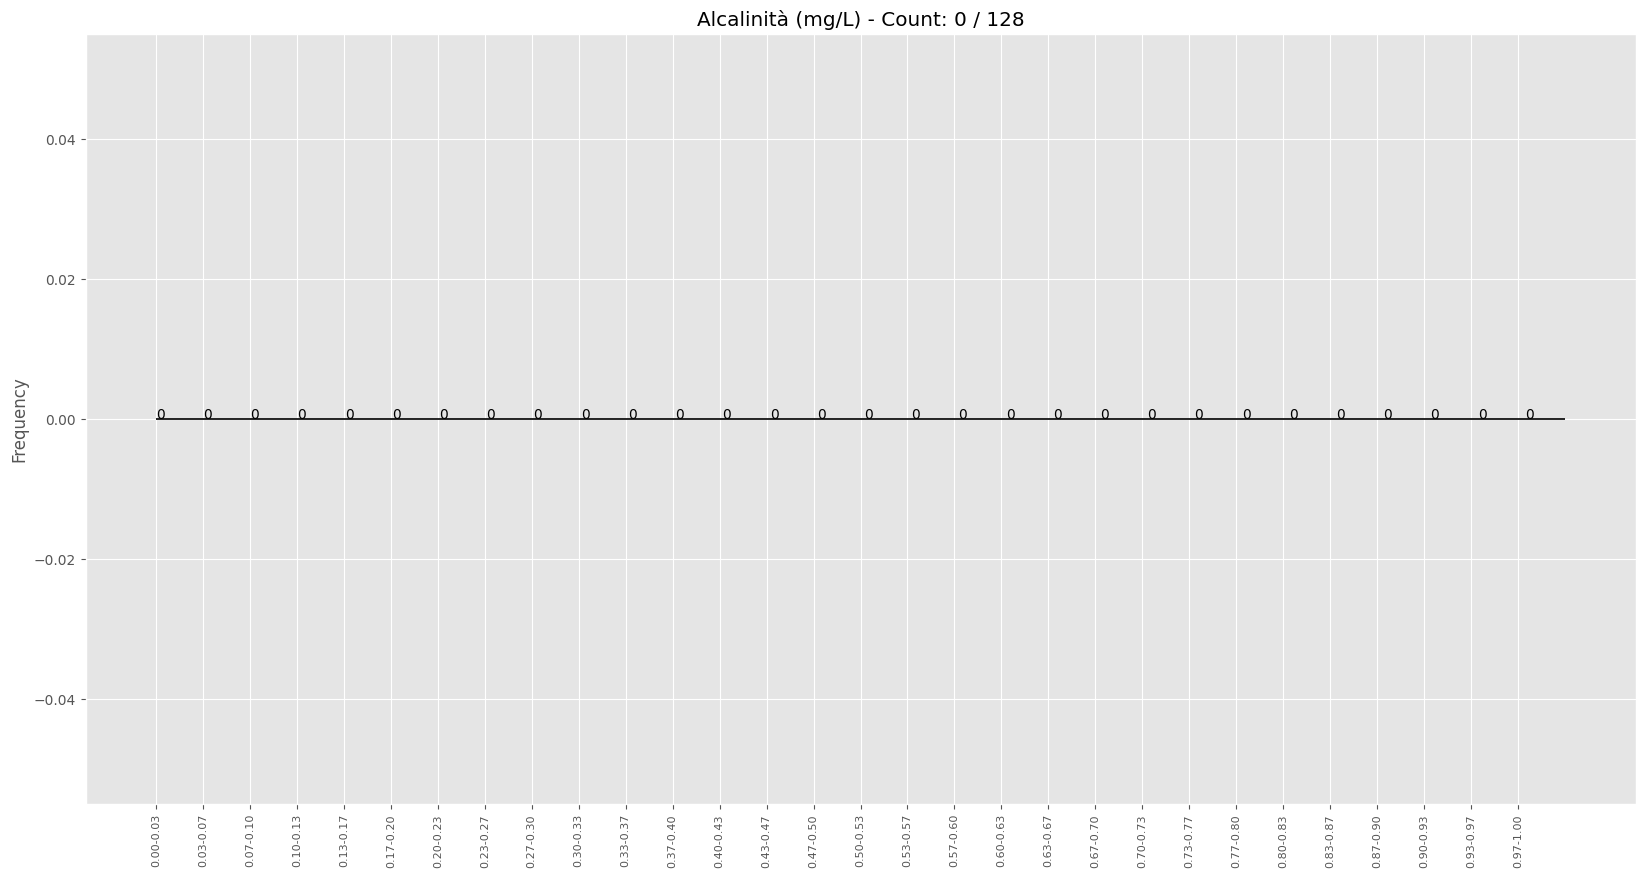

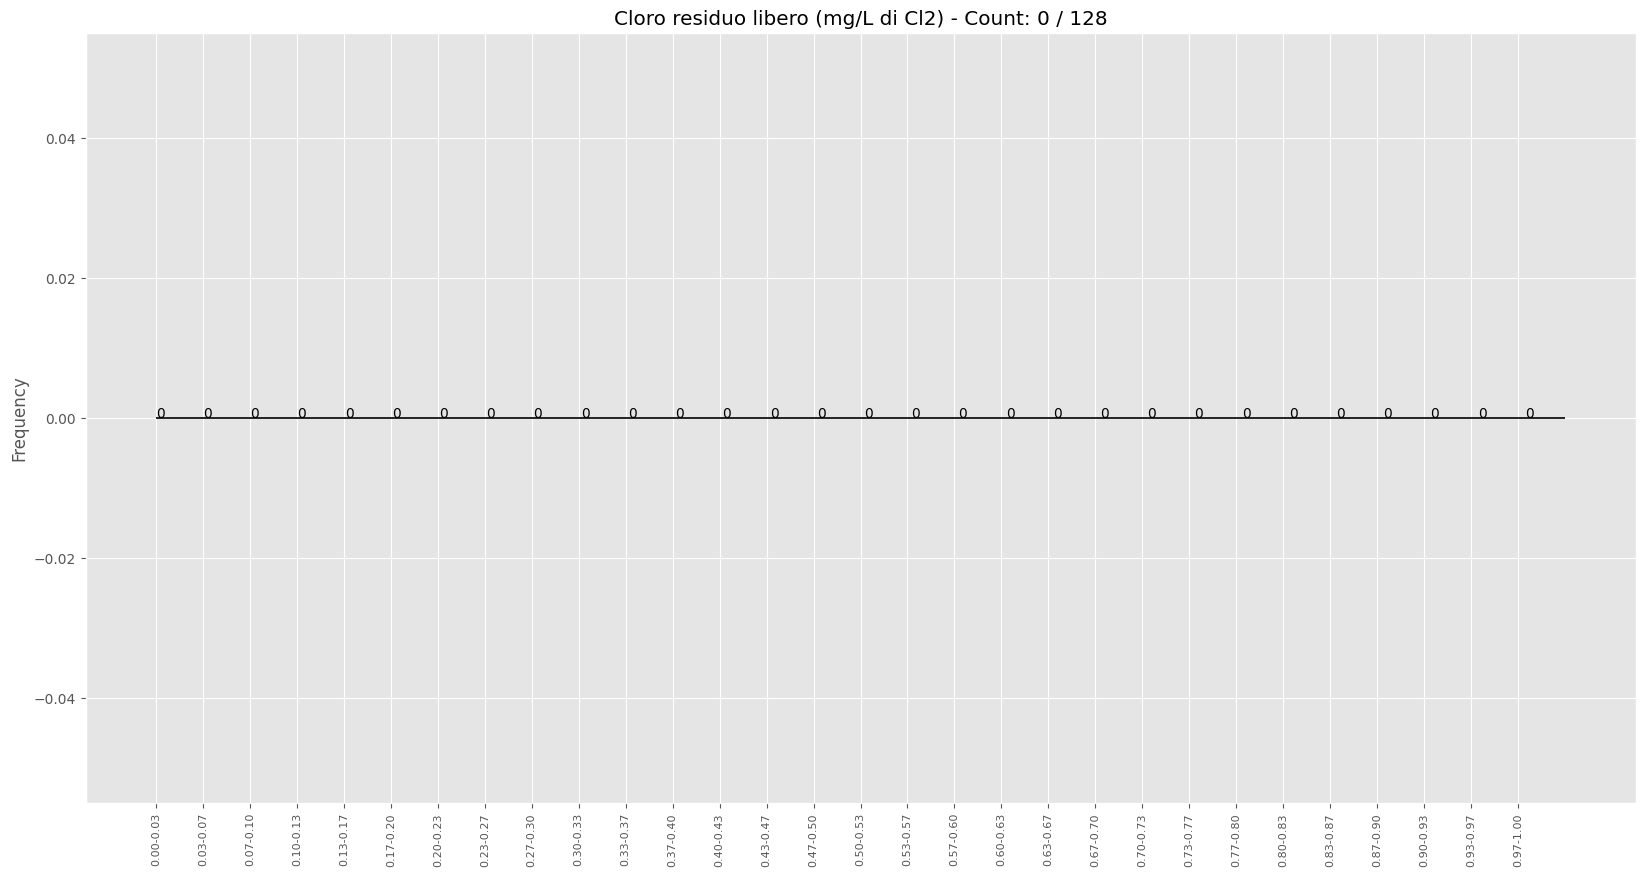

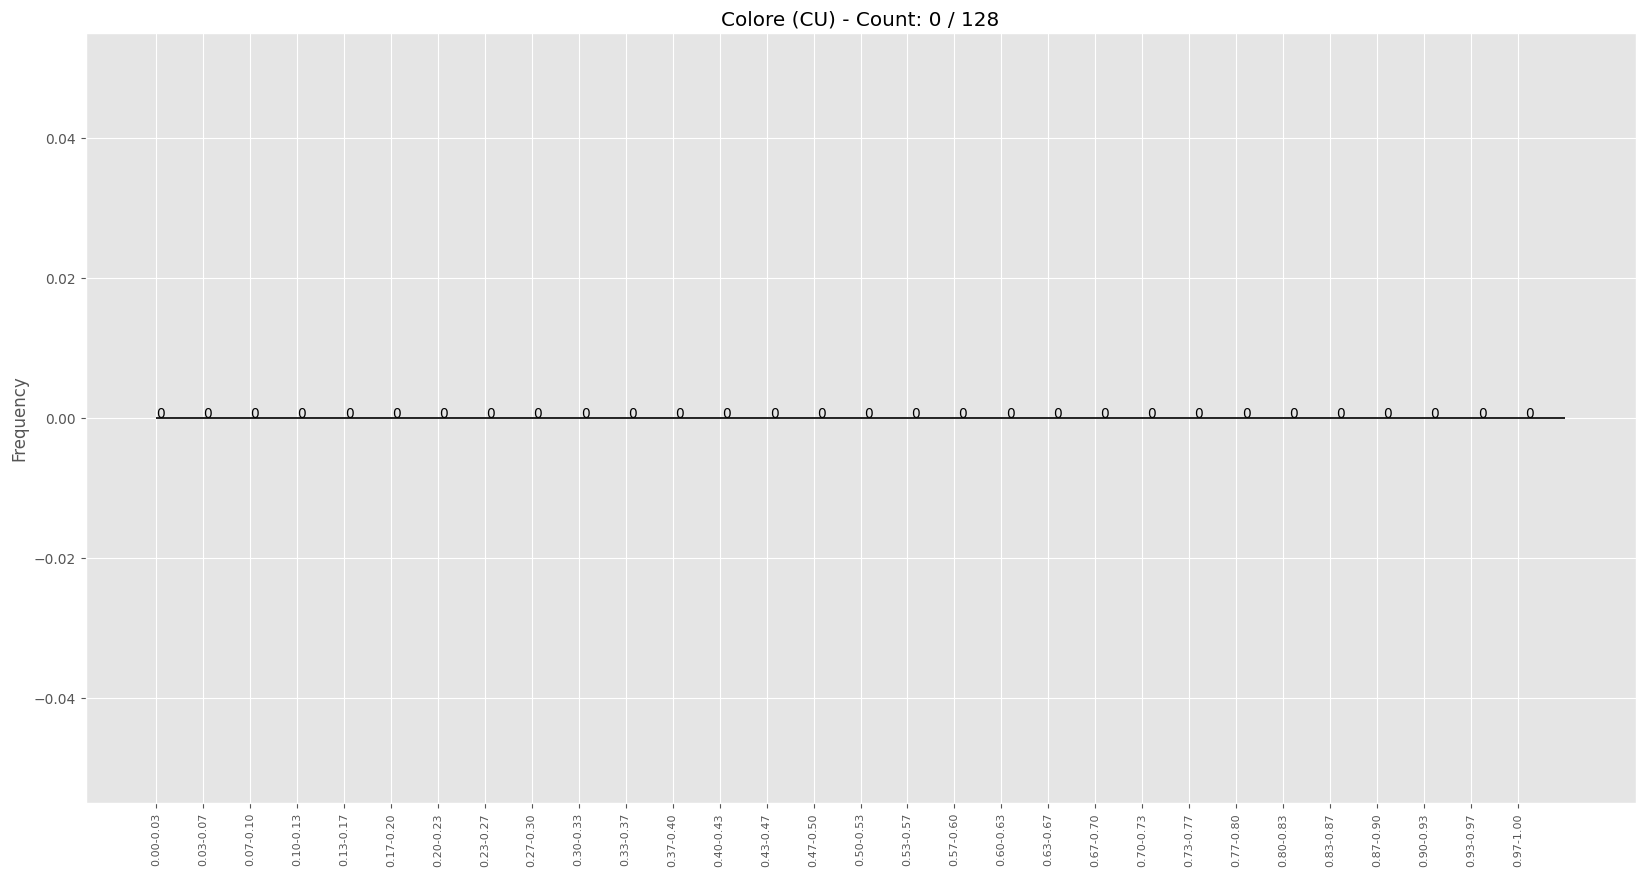

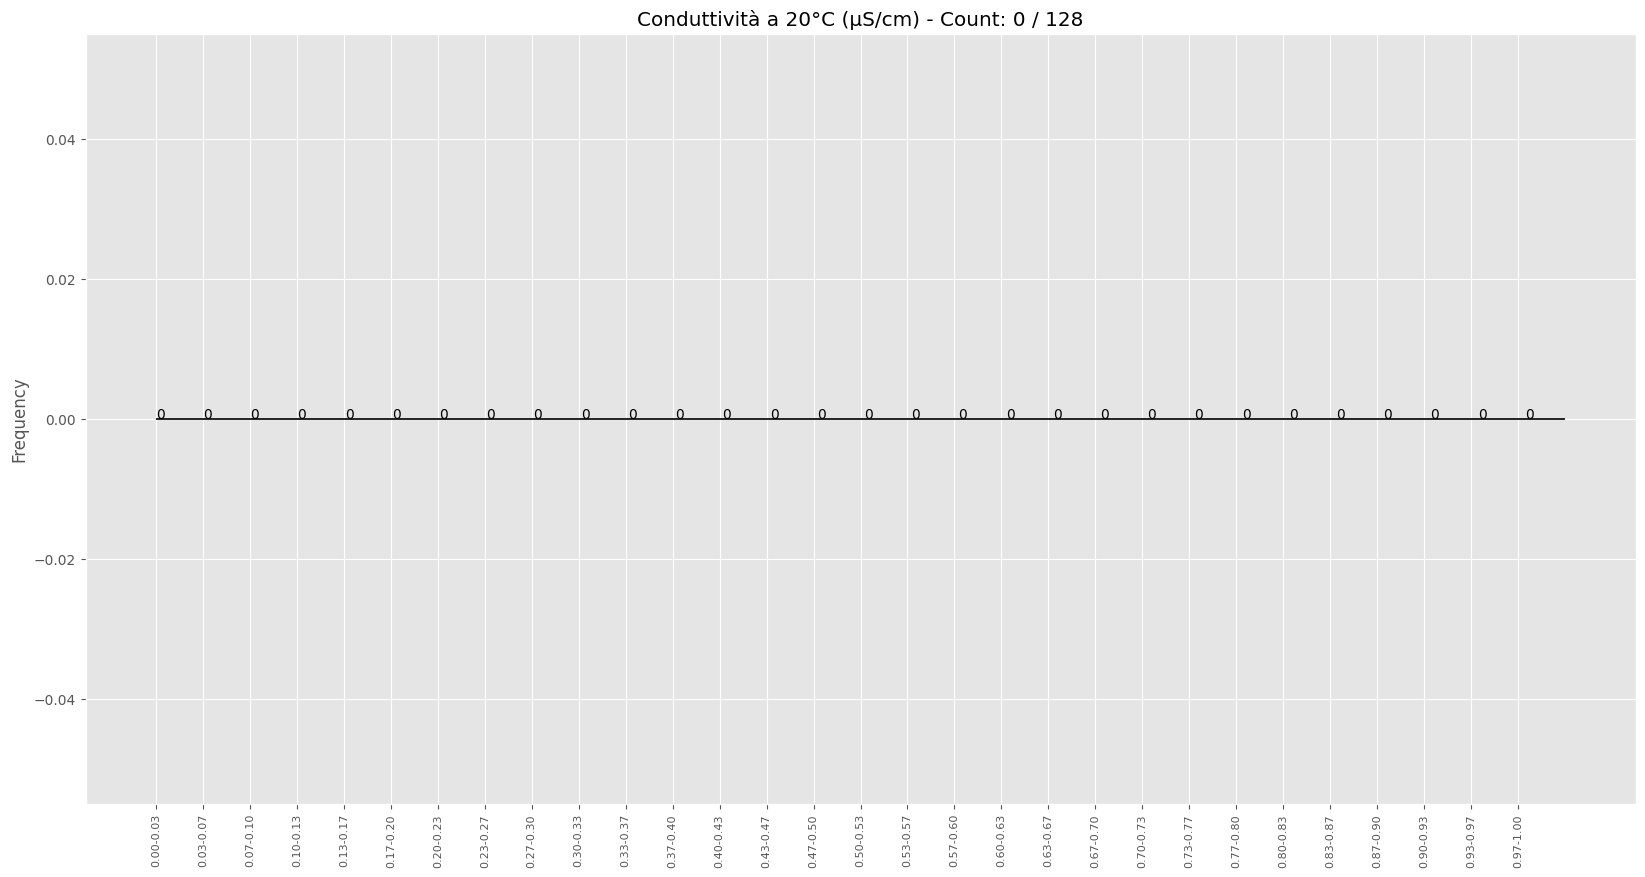

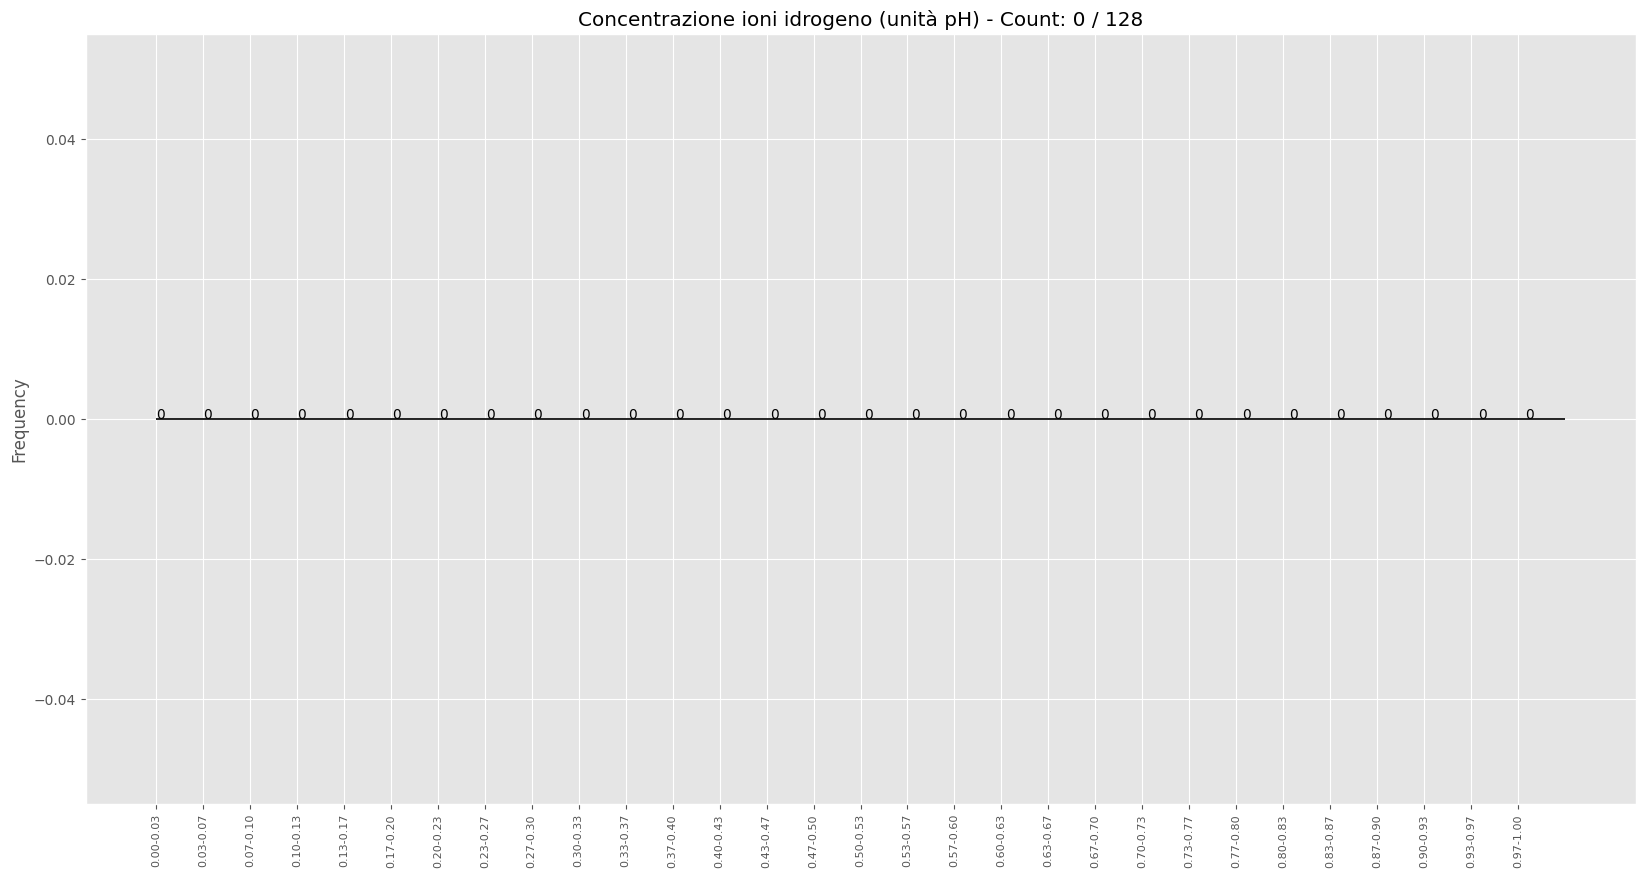

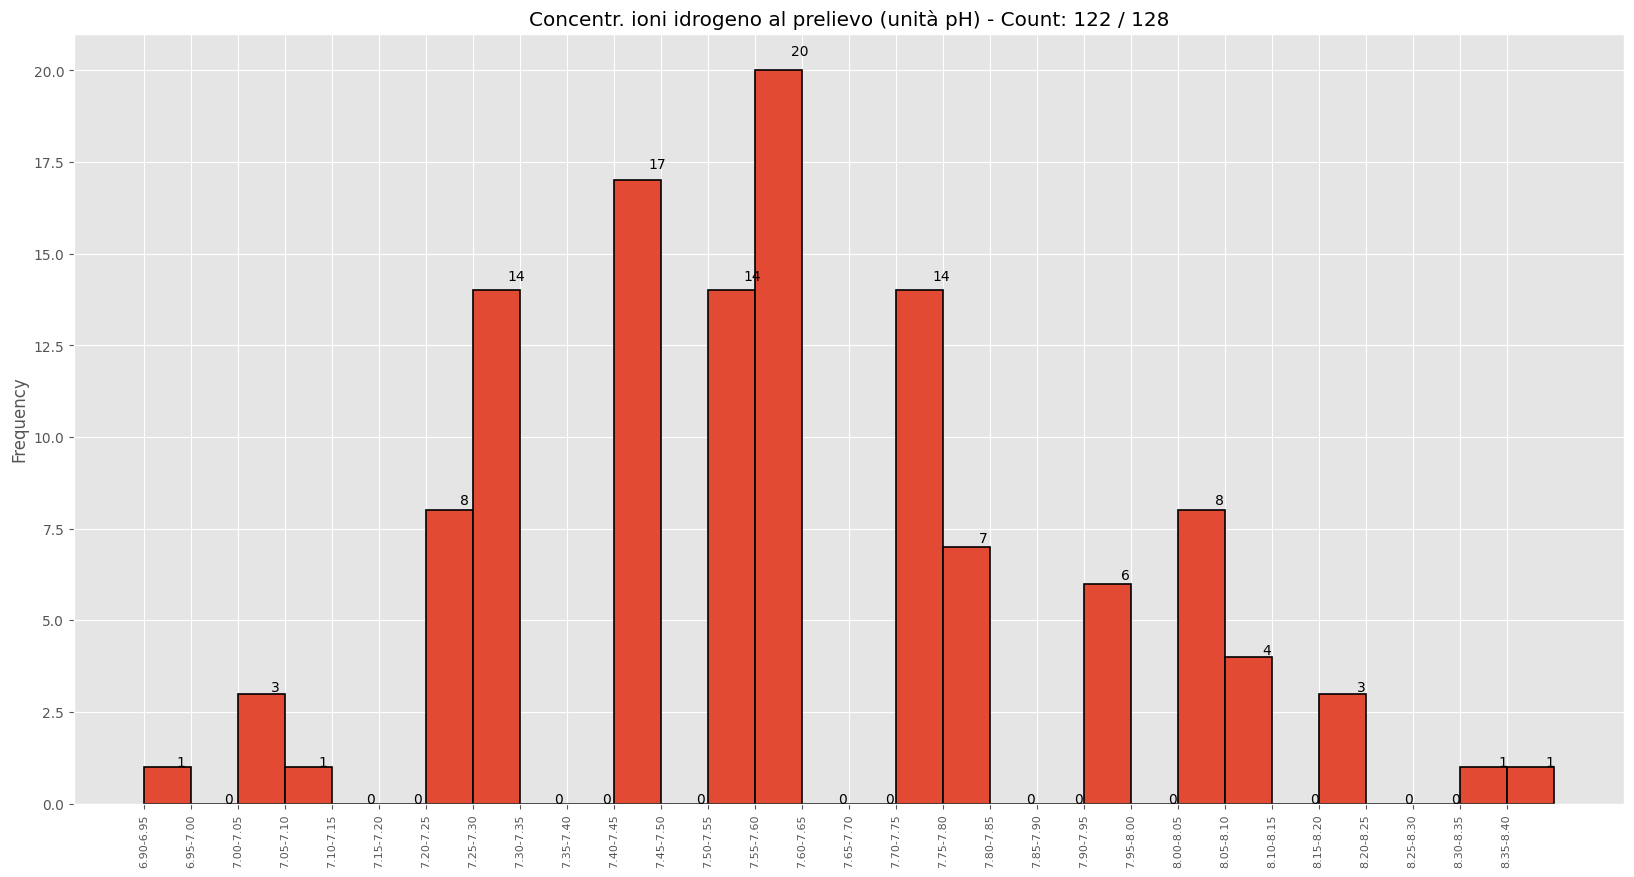

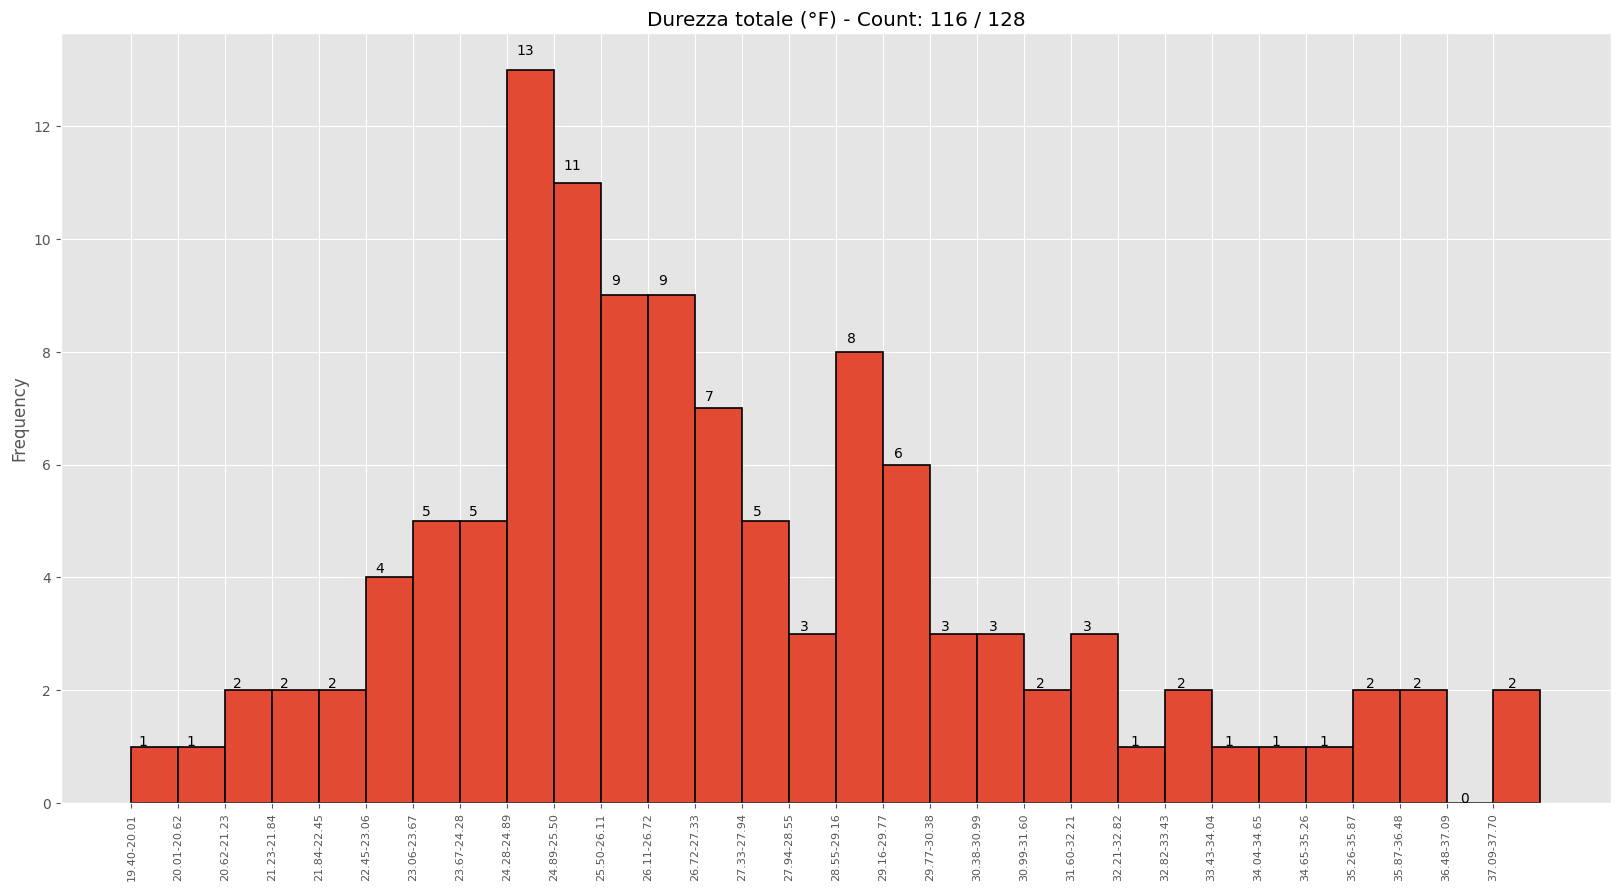

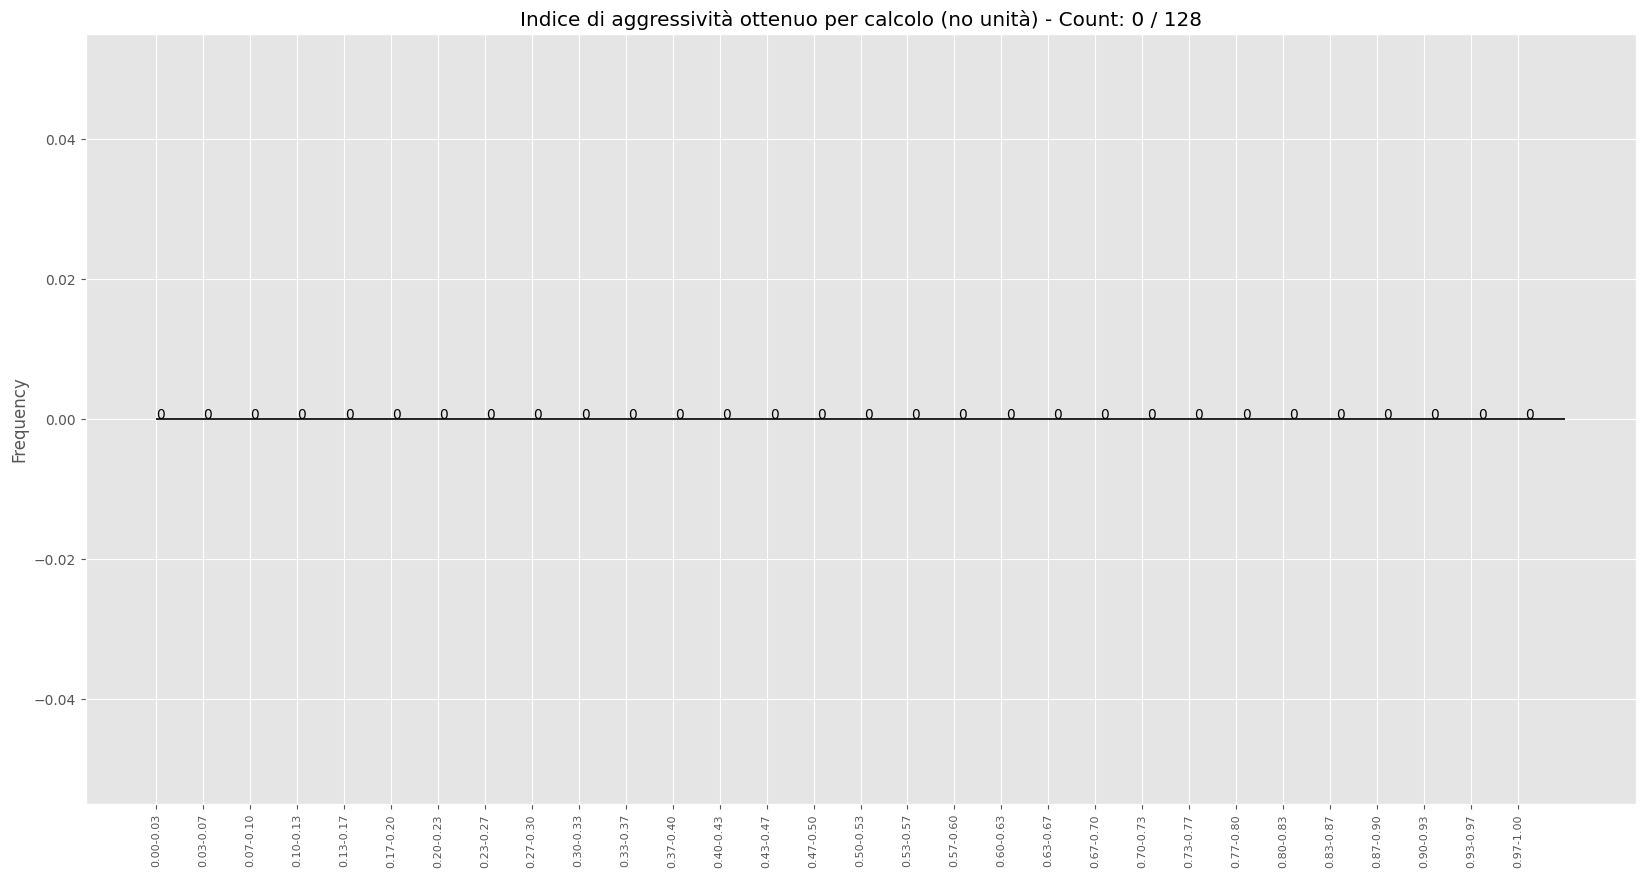

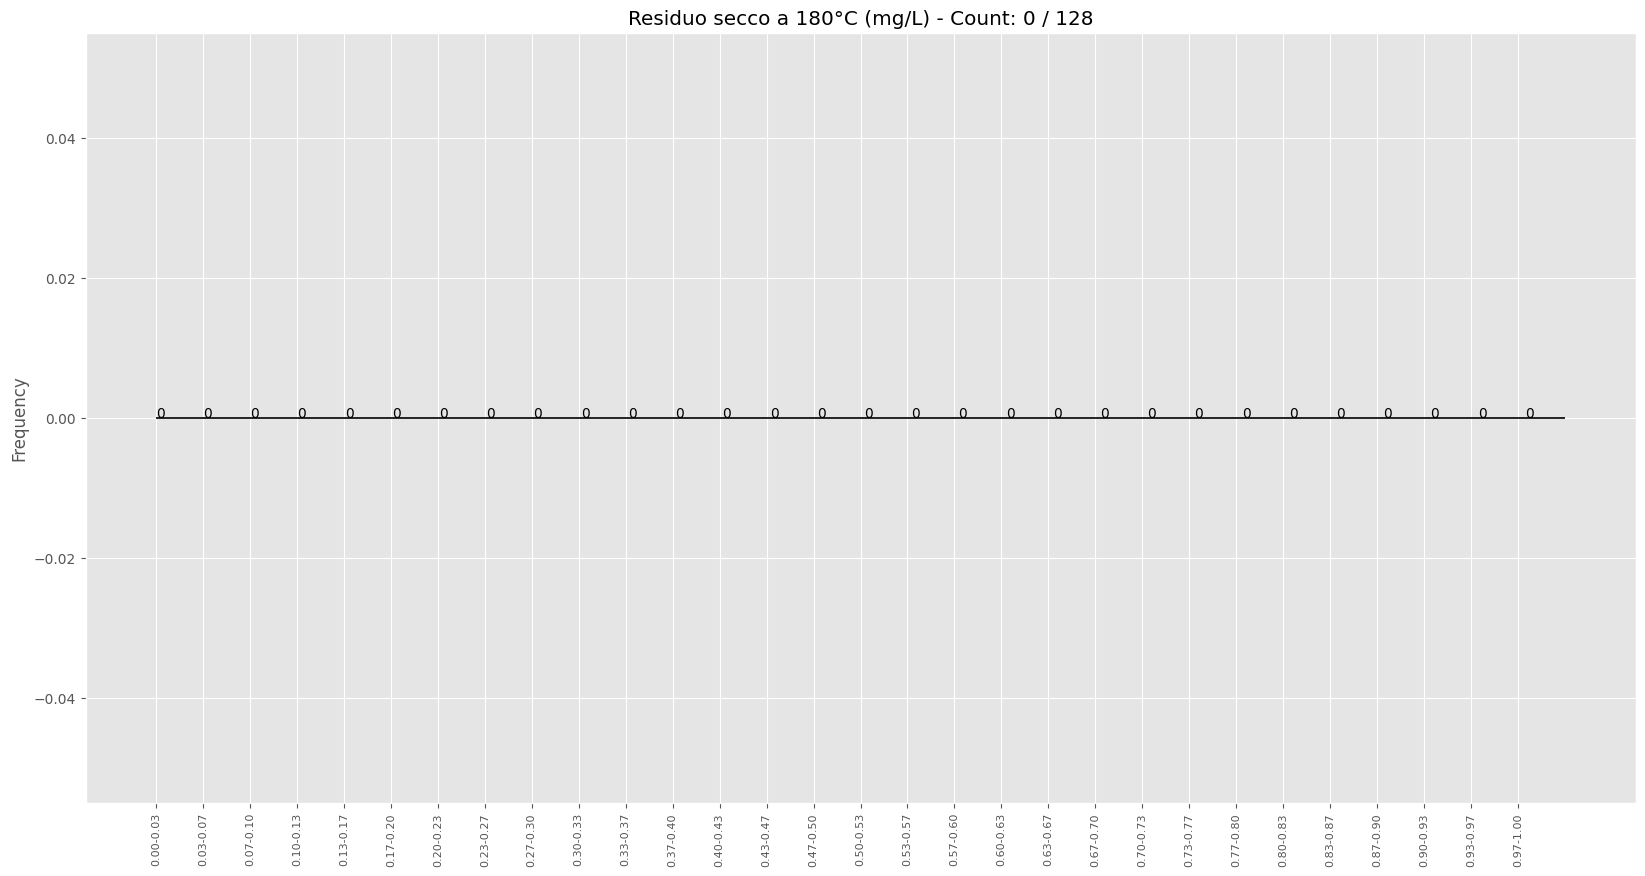

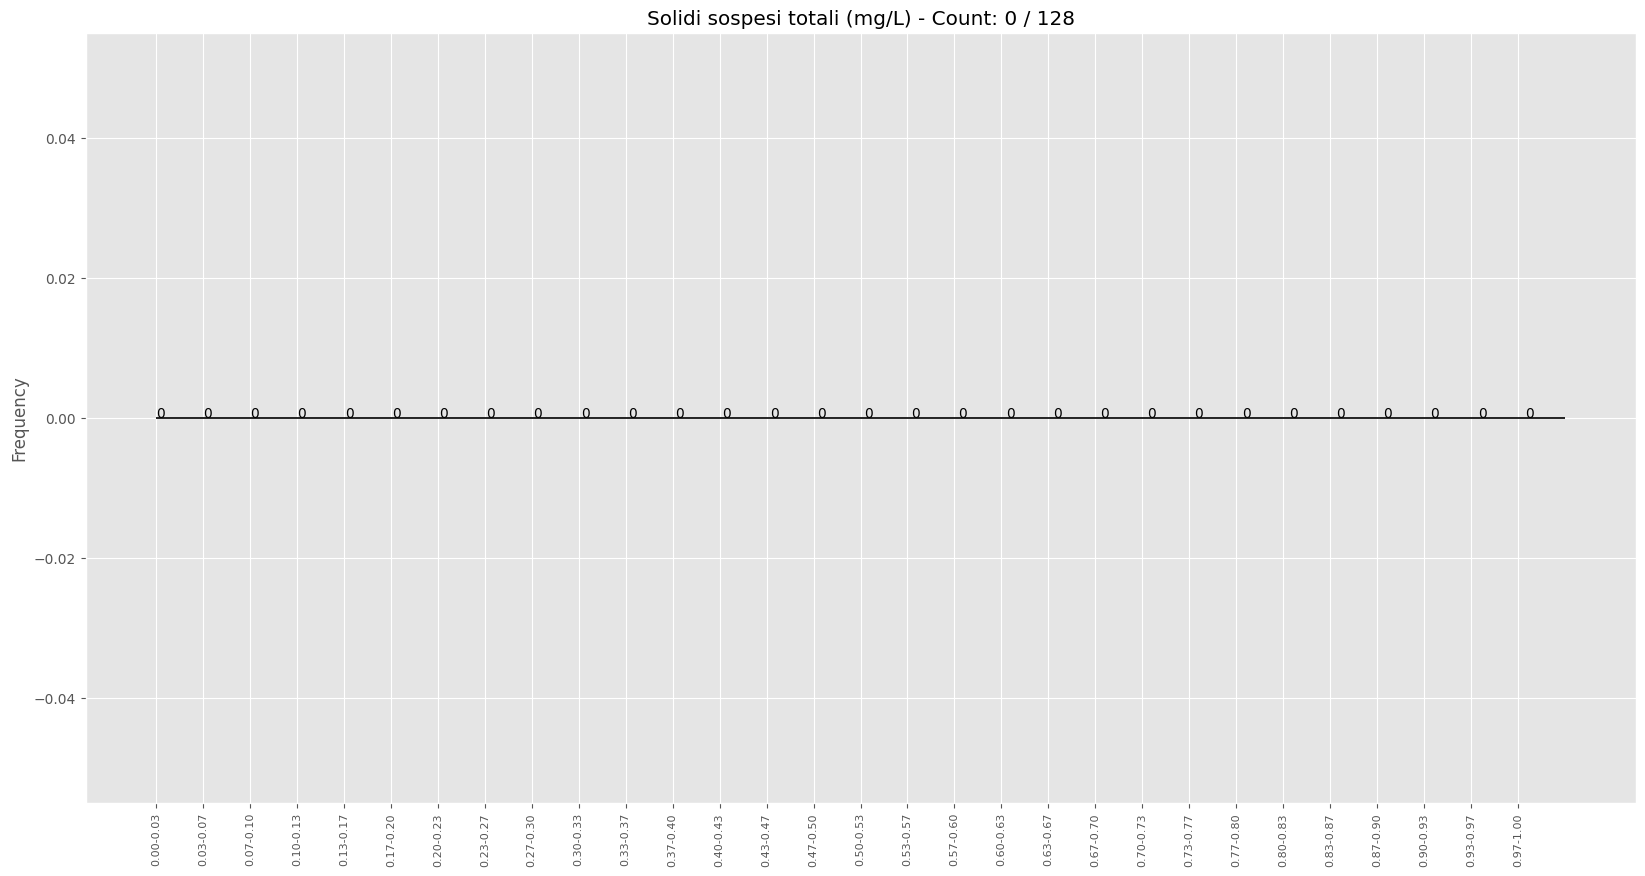

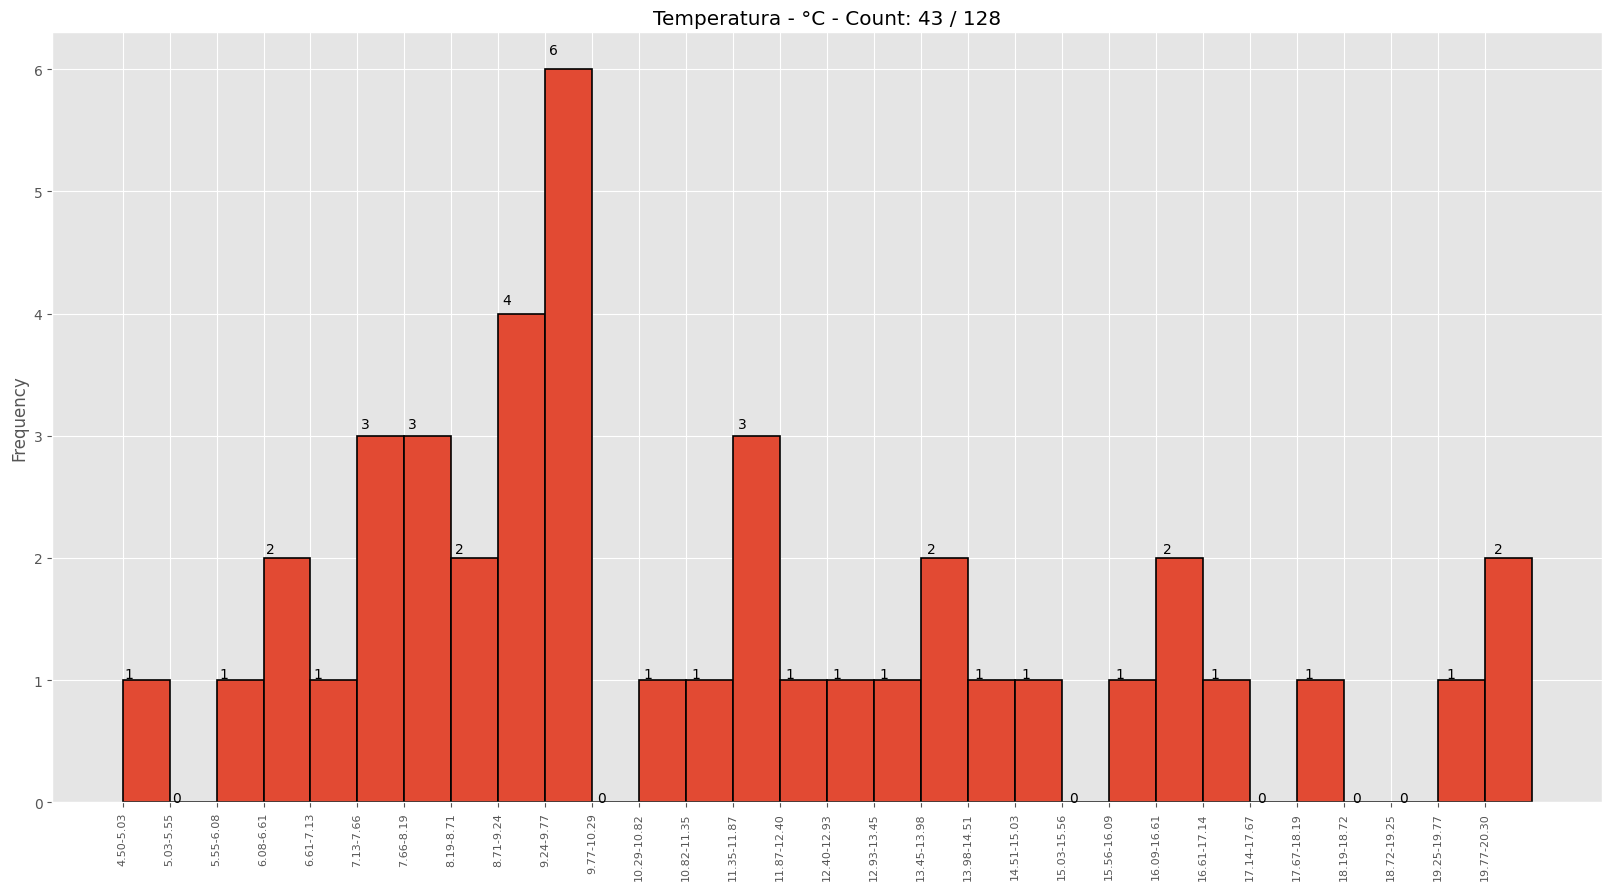

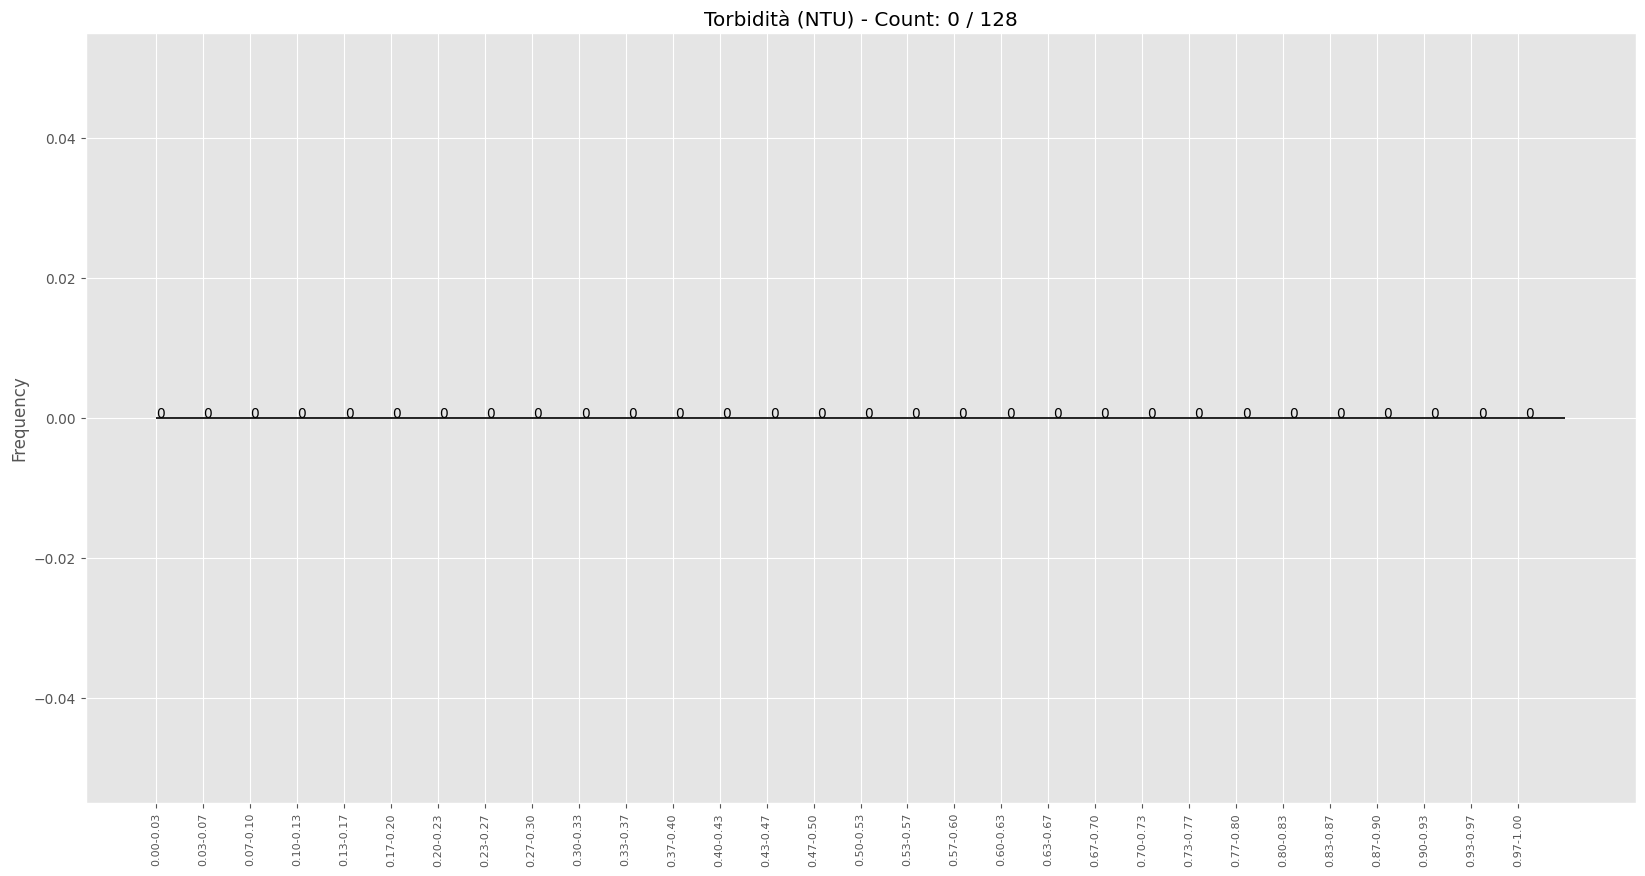

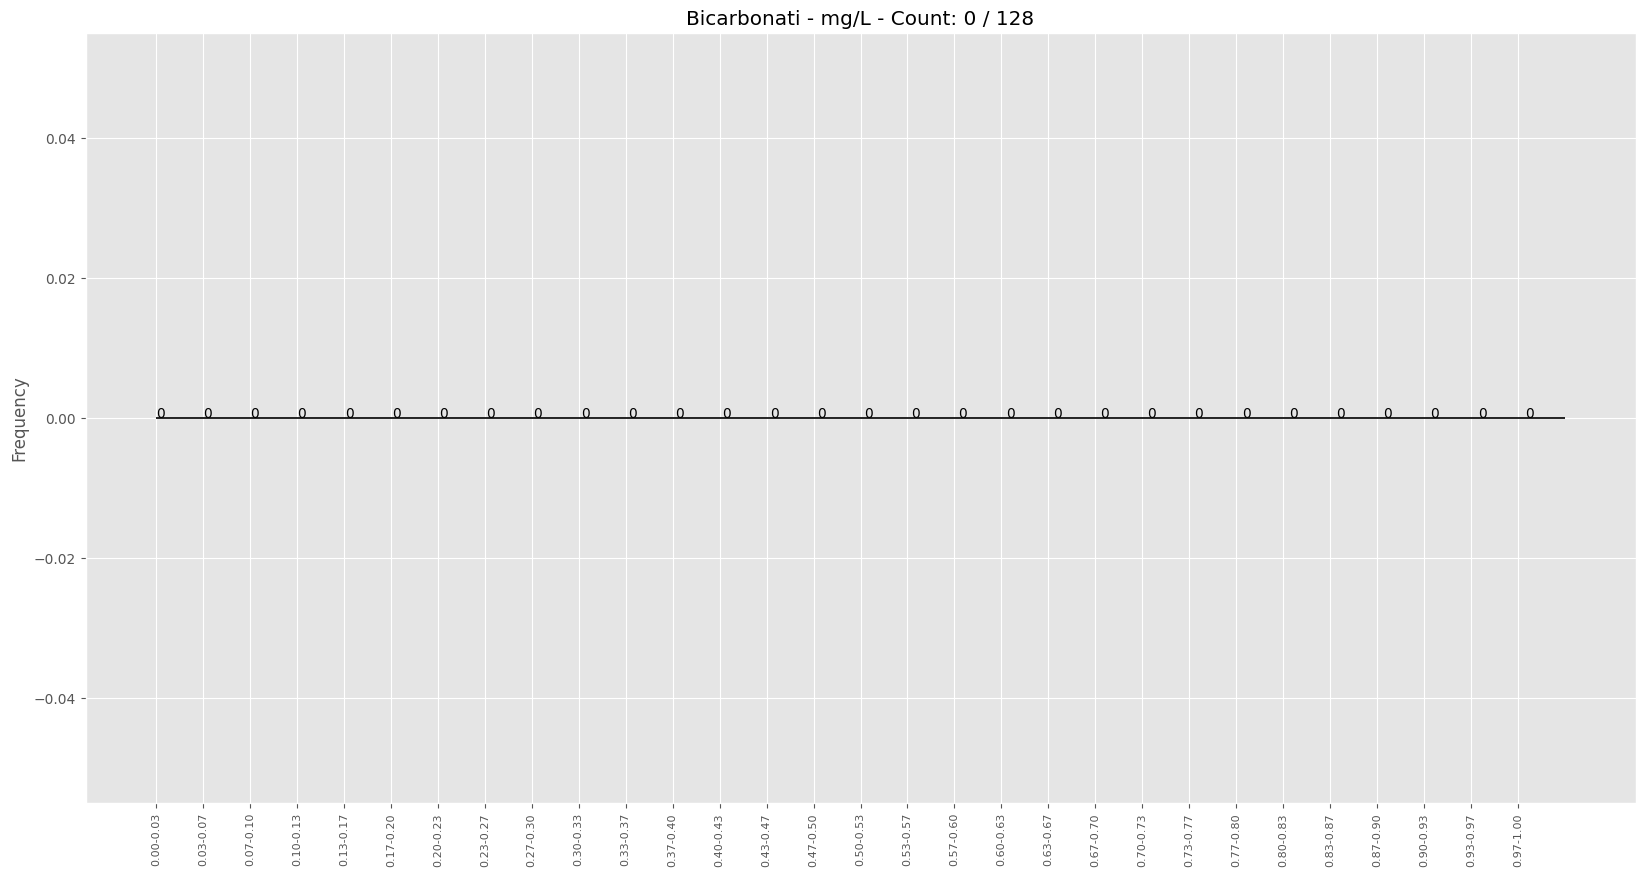

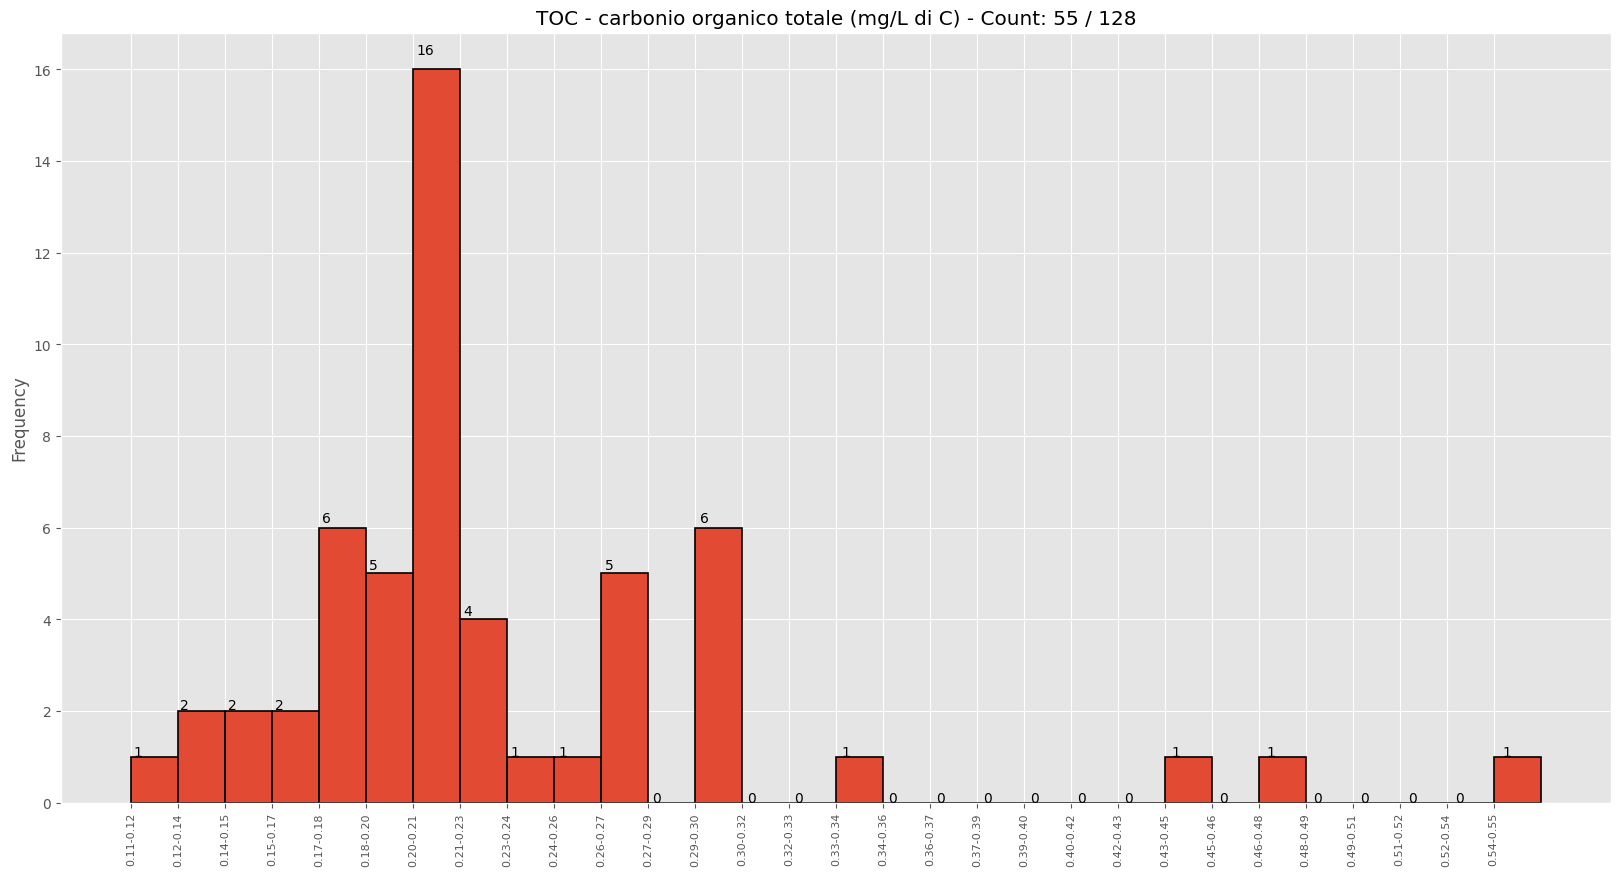

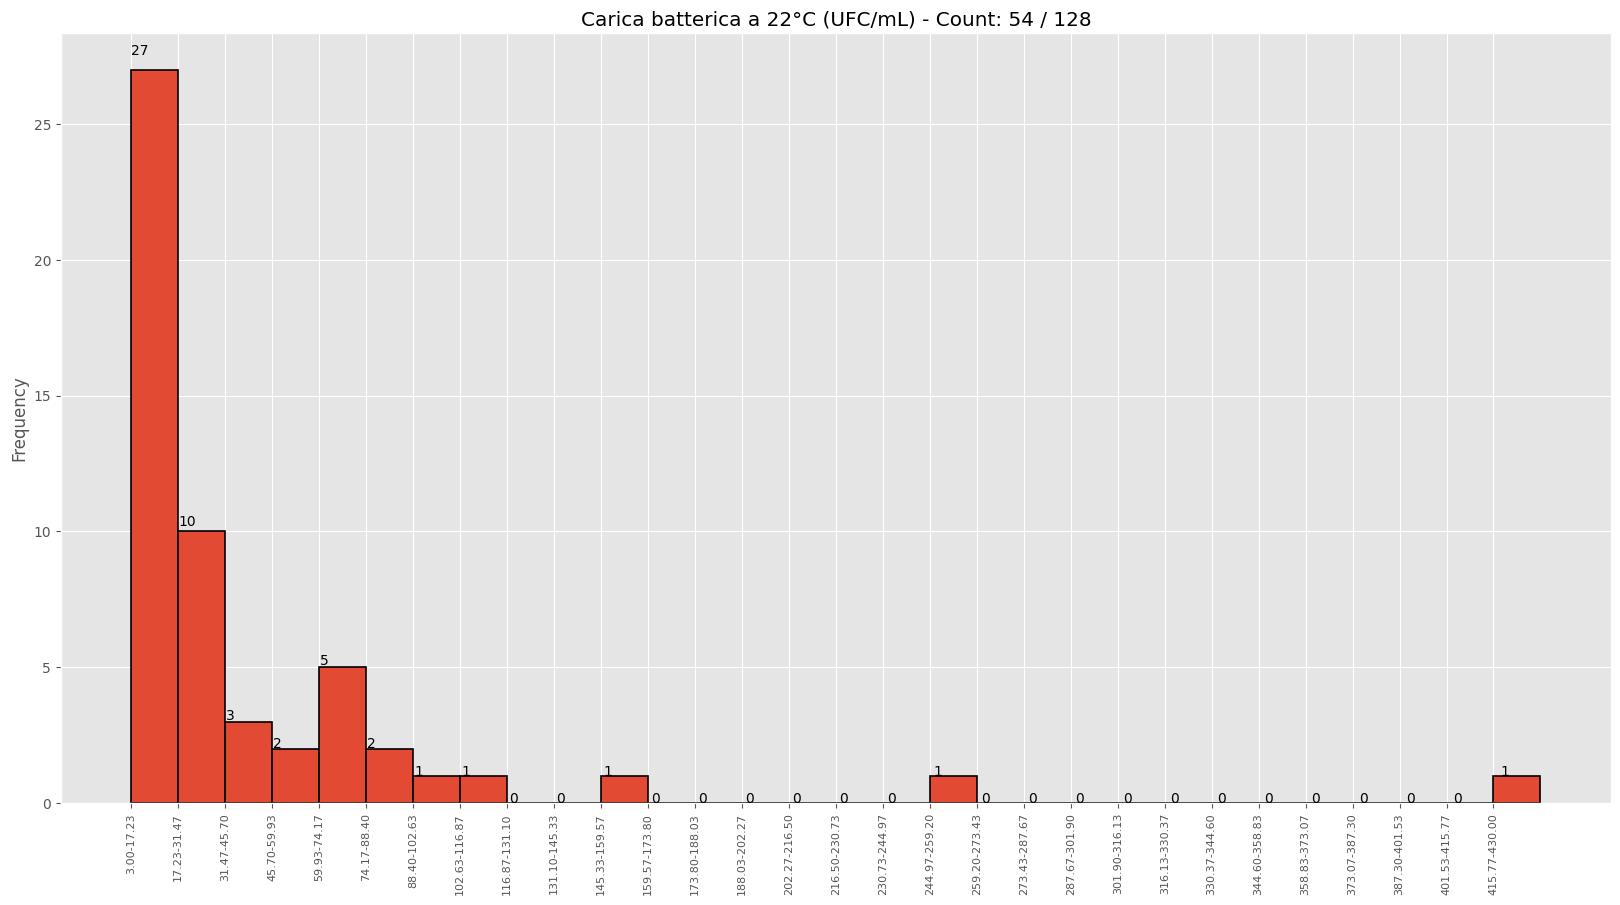

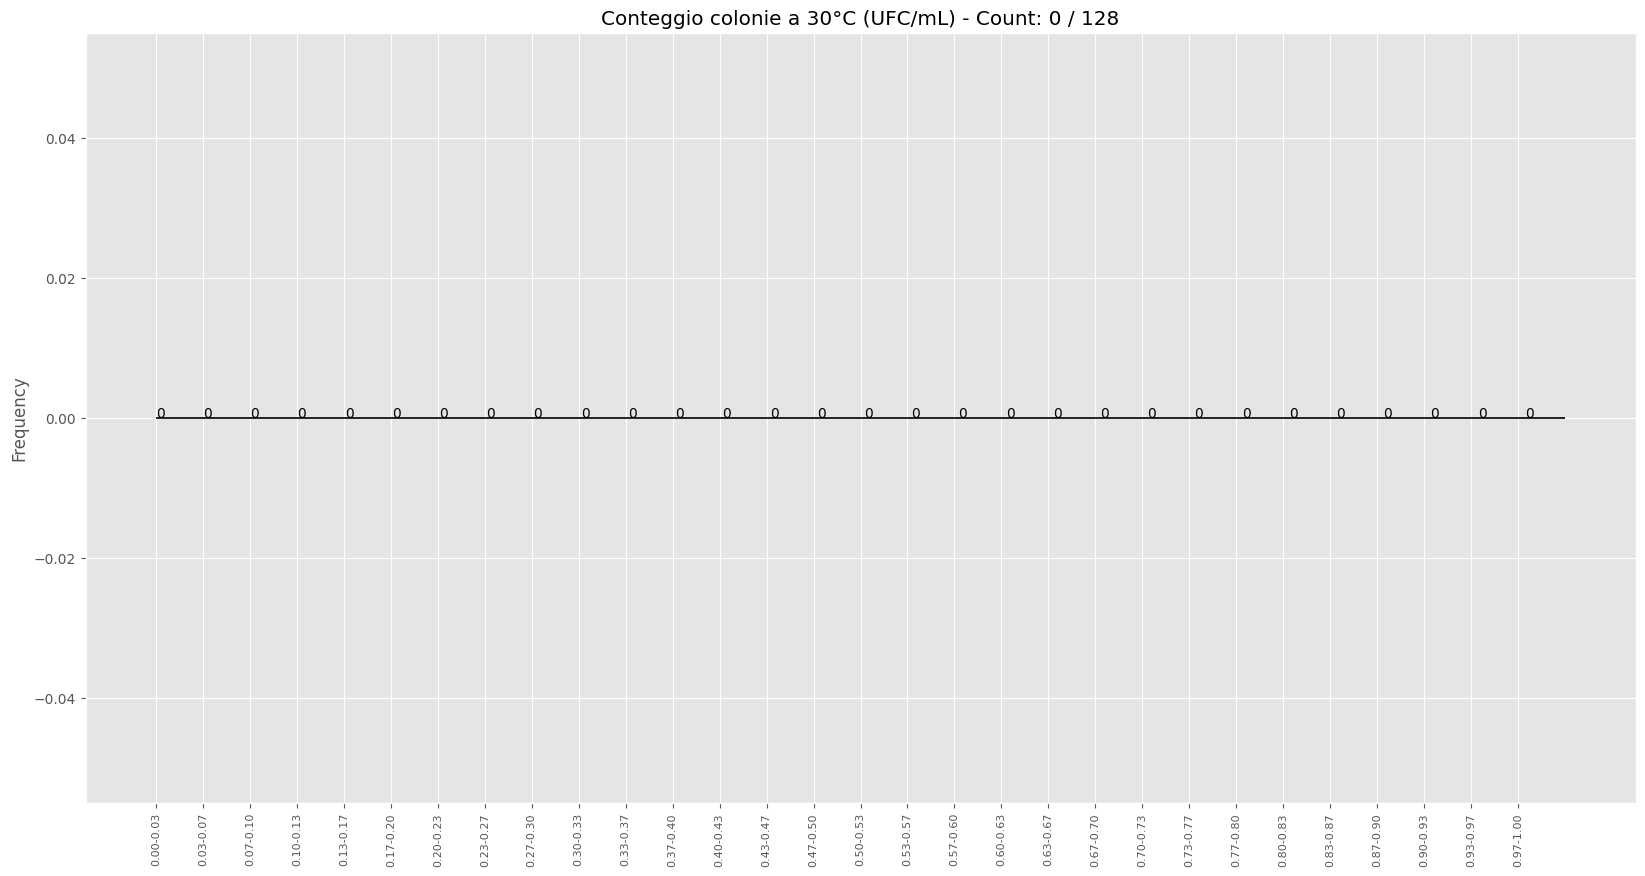

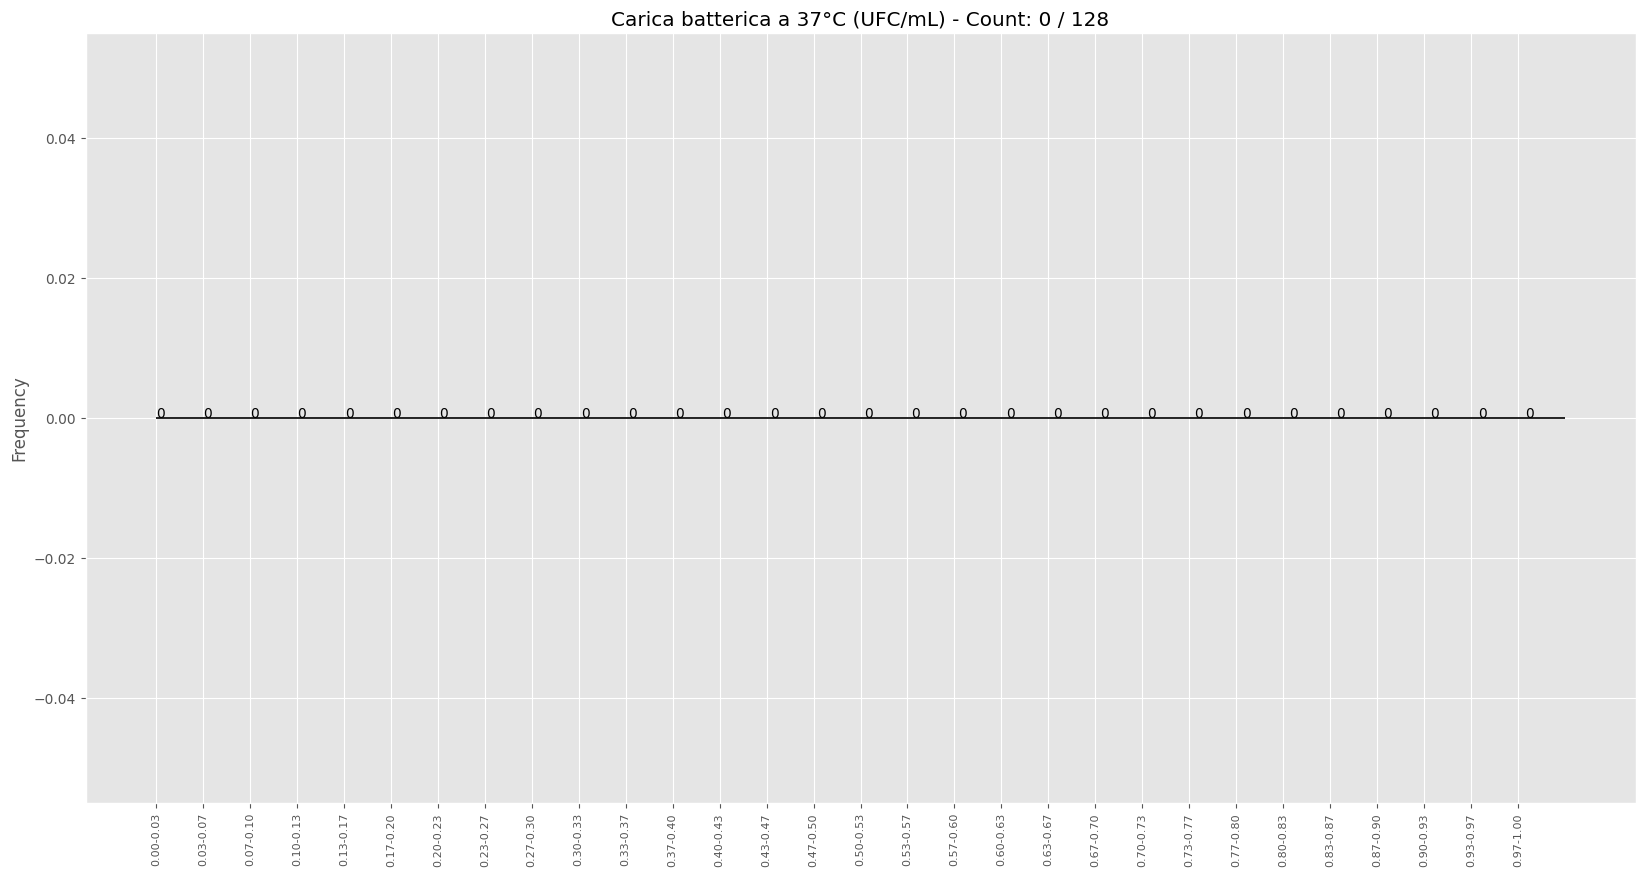

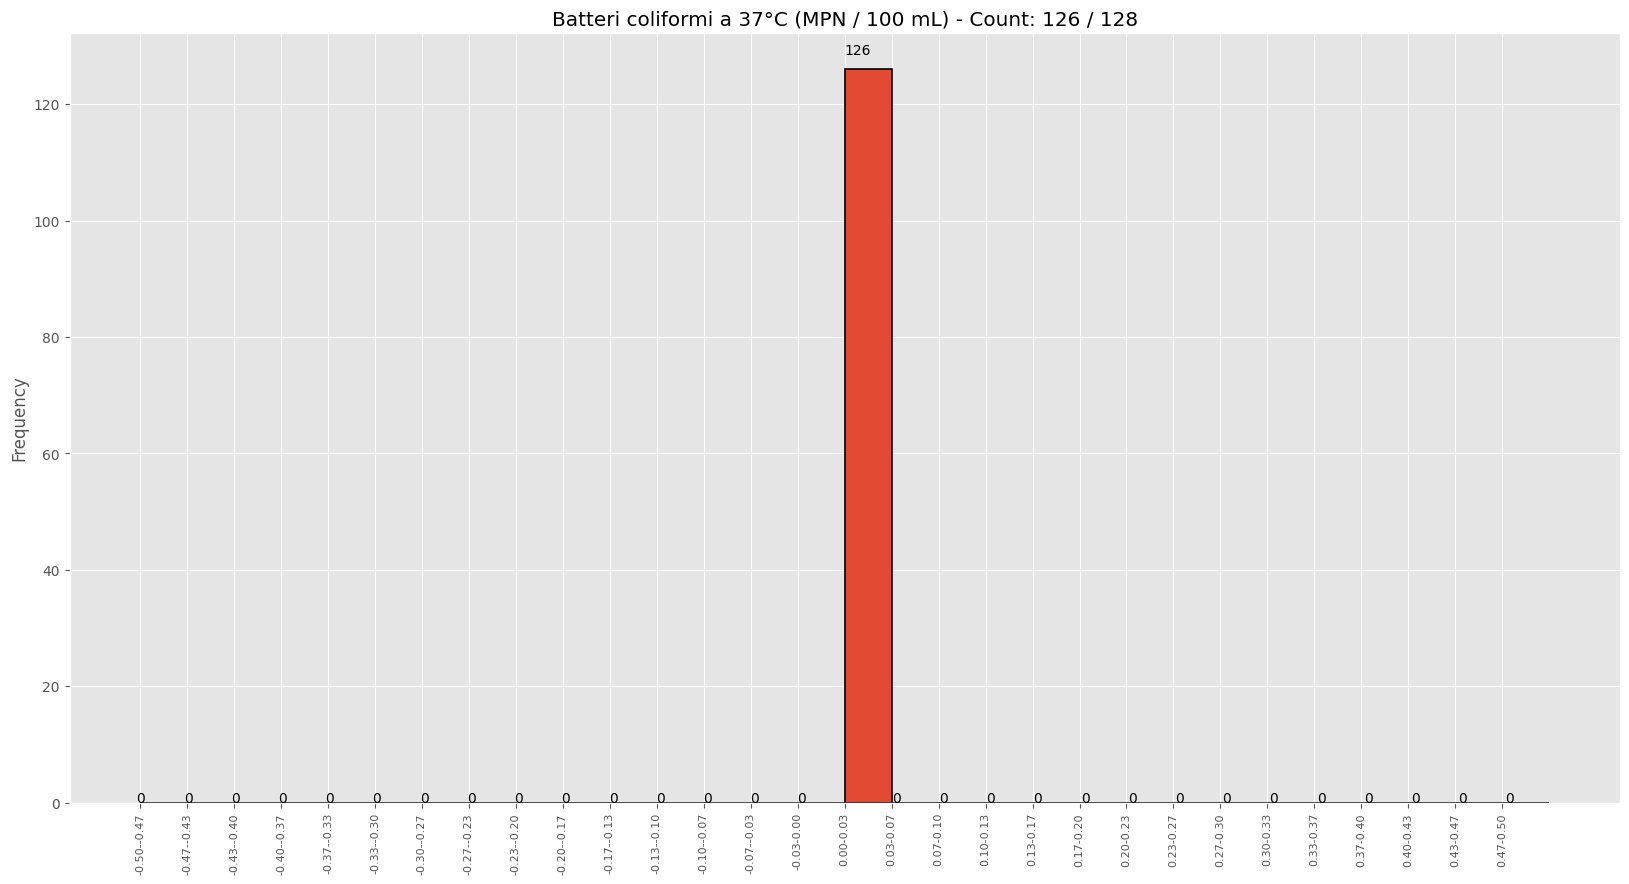

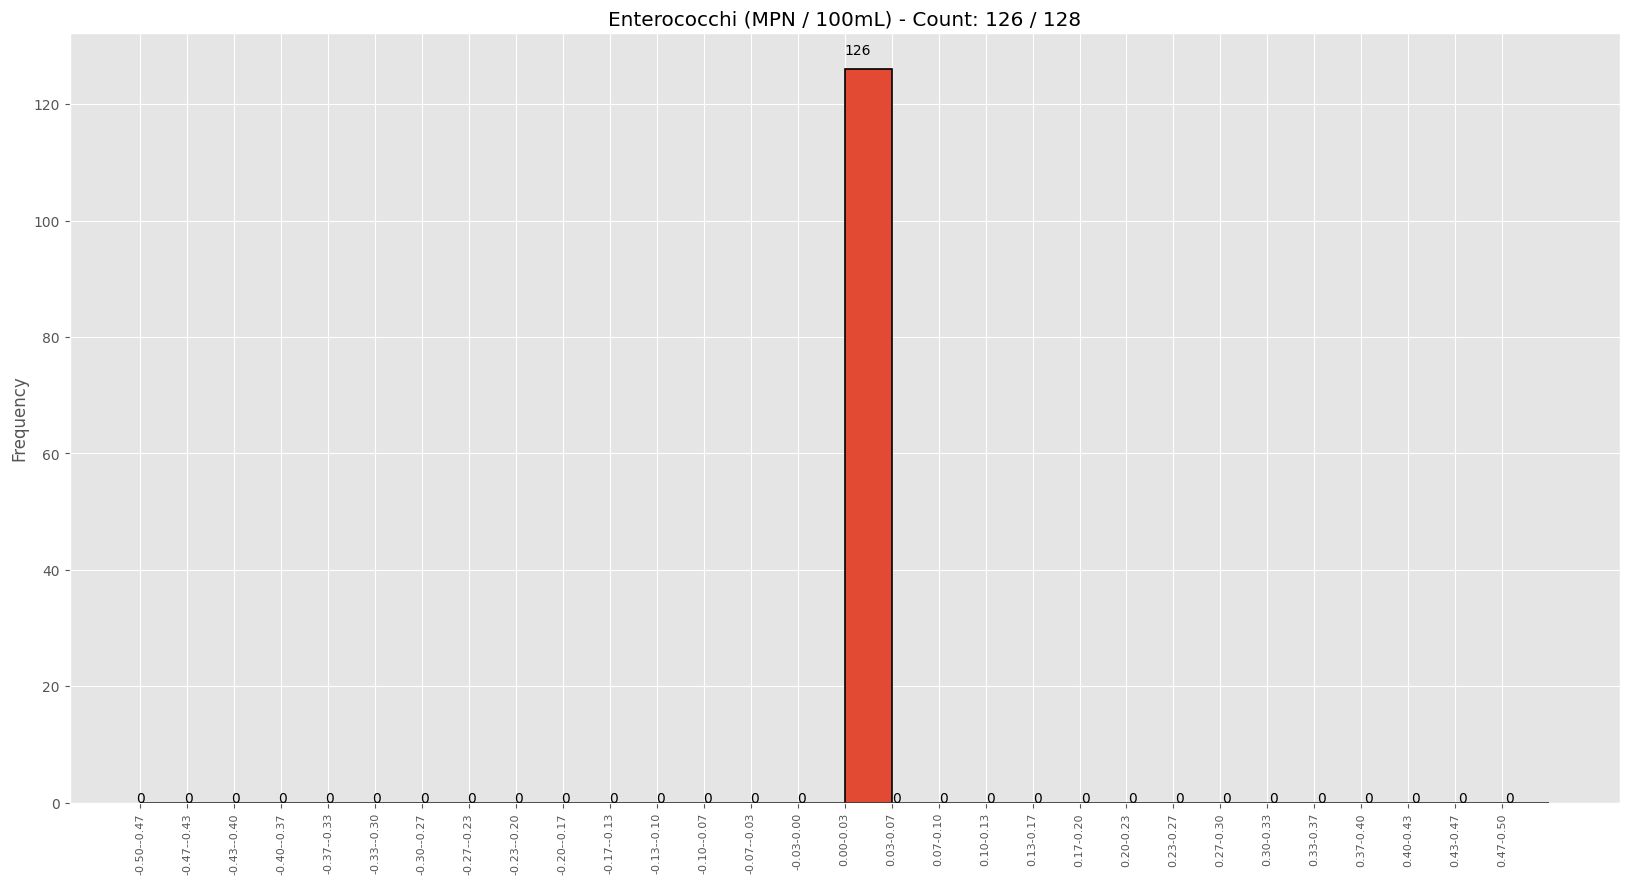

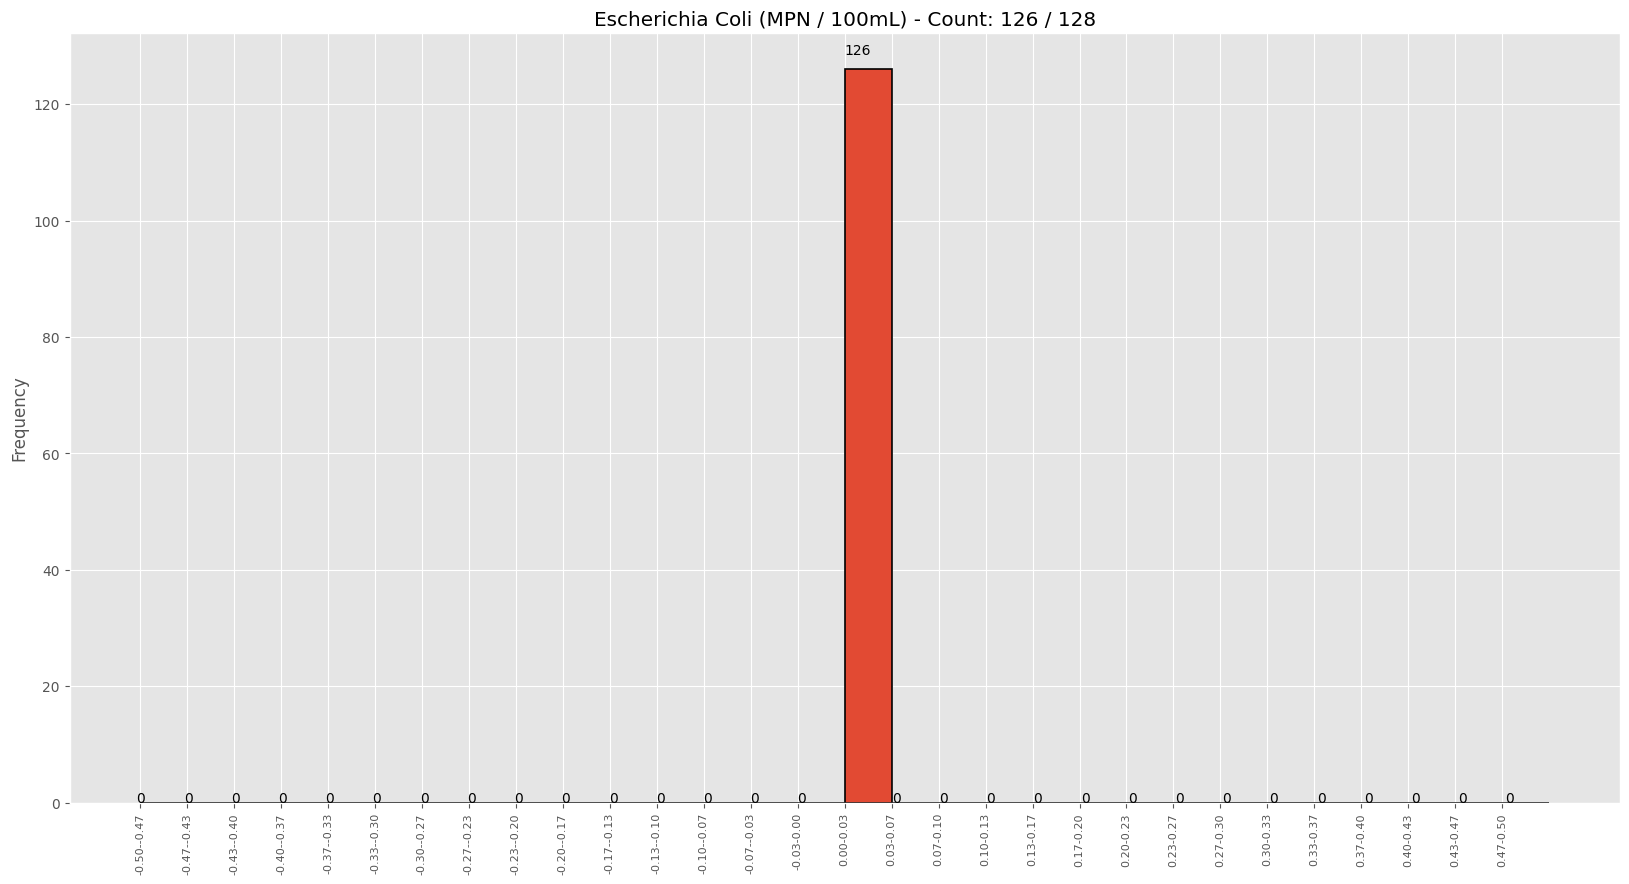

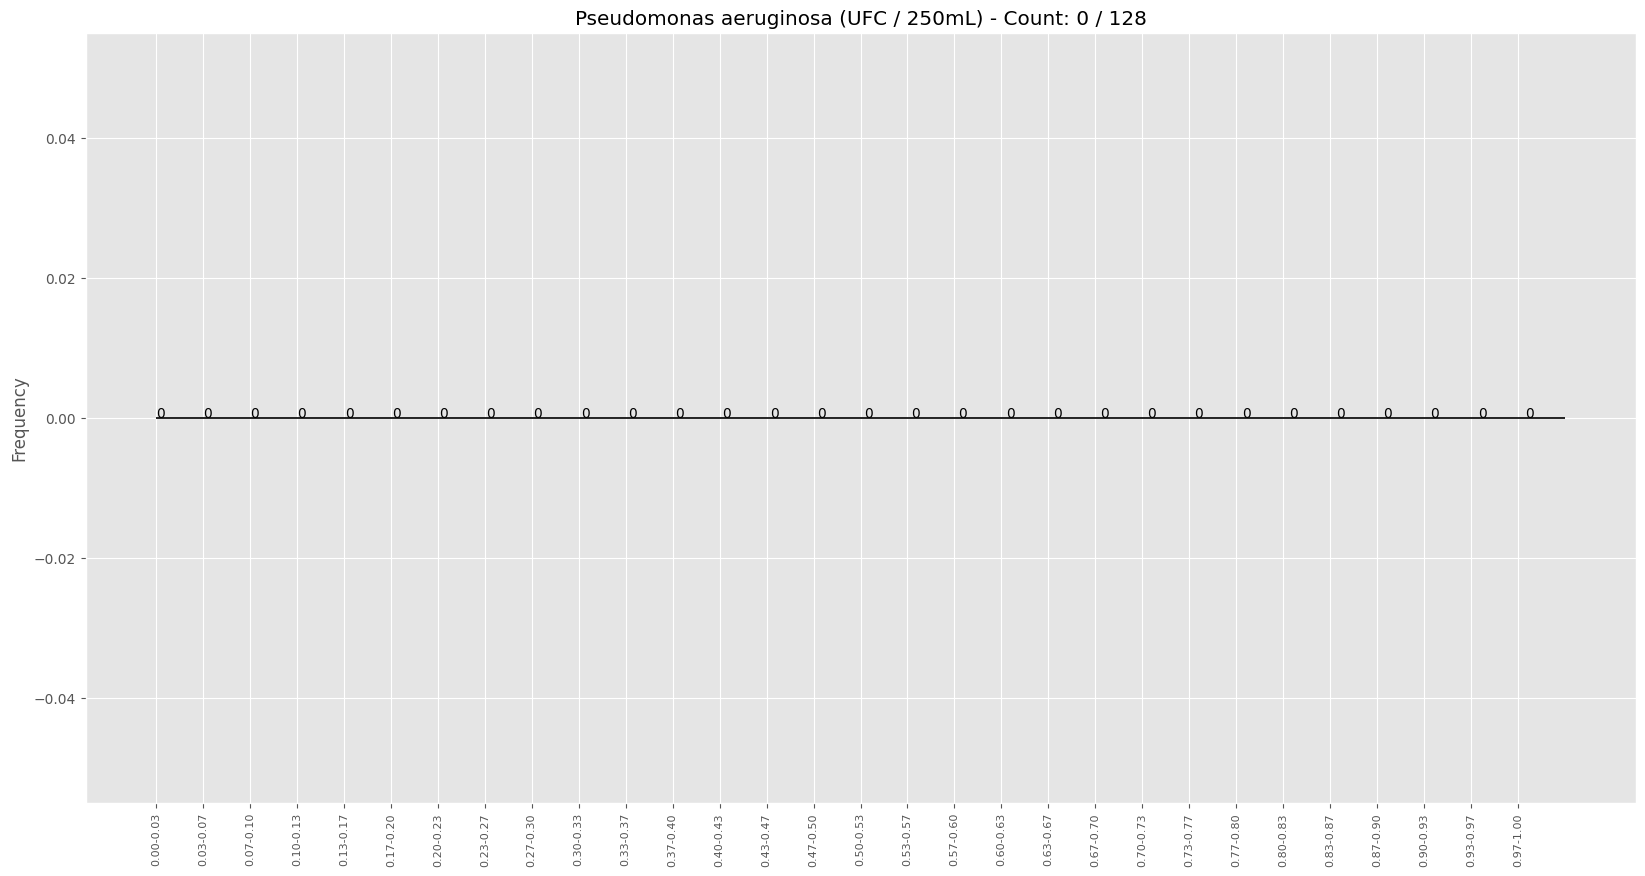

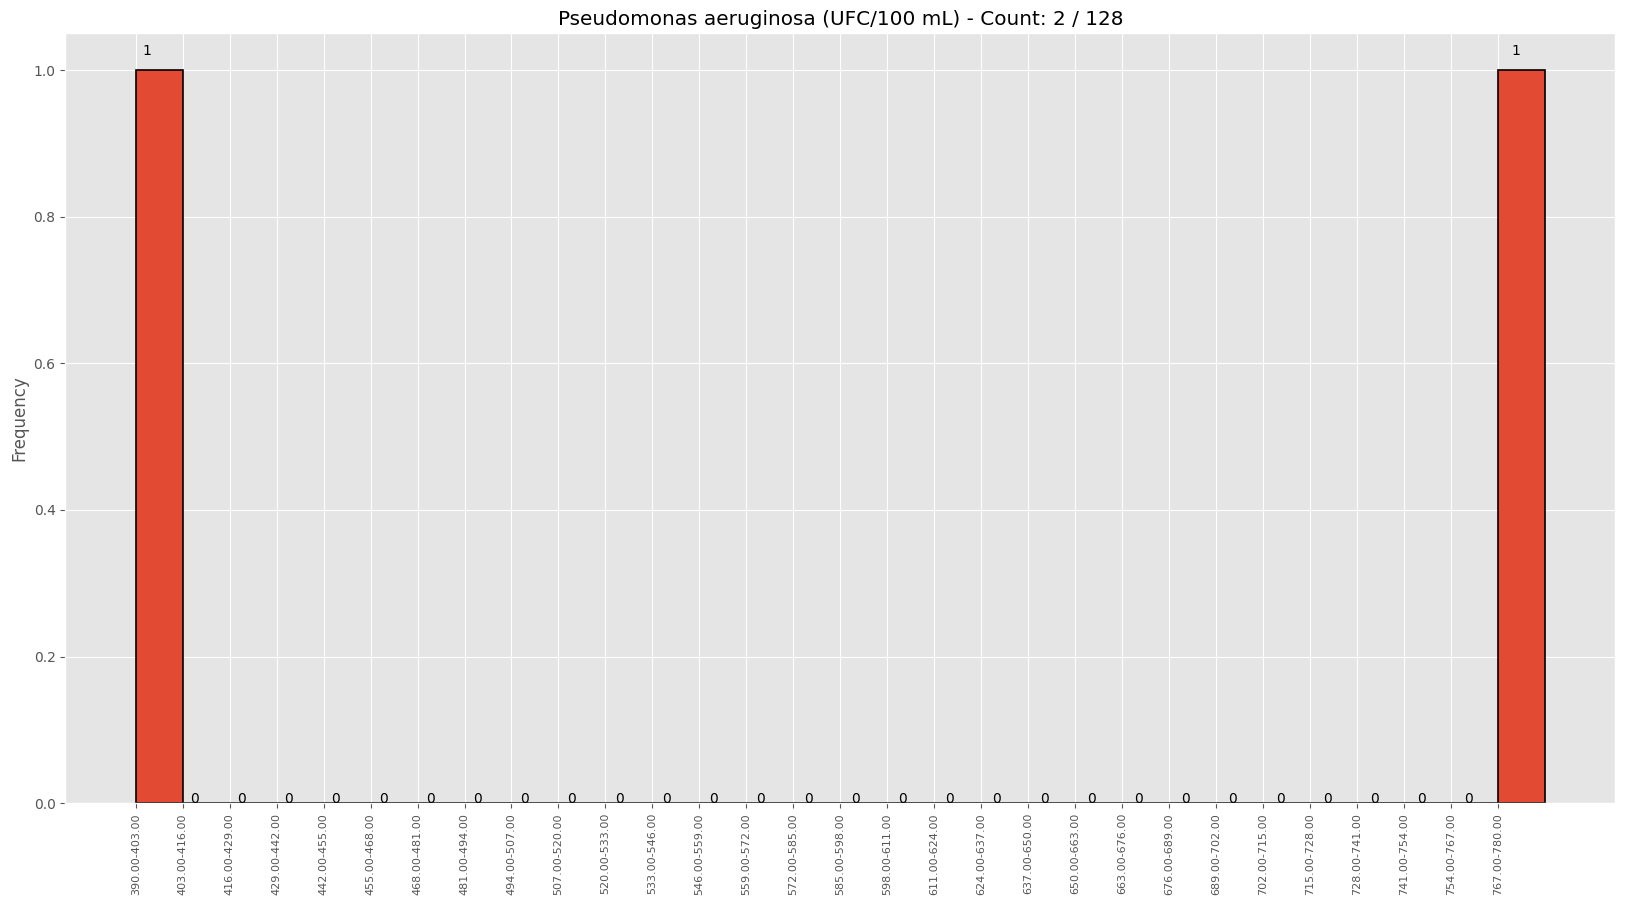

In [175]:
plt.style.use("ggplot")

for column in columns:
    plt.figure(figsize=(20, 10))
    hist = grab_samples_df[column].where(
        grab_samples_df[column].apply(lambda x: isinstance(x, (int, float)))
    )
    count, bins, patches = plt.hist(
        hist.dropna(), bins=30, edgecolor="black", linewidth=1.2
    )
    plt.title(
        column
        + " - Count: "
        + str(hist.count())
        + " / "
        + str(grab_samples_df.shape[0])
    )
    plt.ylabel("Frequency")

    # Set x-ticks to bin edges and x-tick labels to intervals
    plt.xticks(
        bins[:-1],
        [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)],
        rotation="vertical",
        fontsize=8,
    )

    # Add count for every bar
    for p in patches:
        plt.annotate(
            str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.02)
        )

In [ ]:
# TODO prima trasformare i dati non numerici in numerici e poi fare il plot

for punto in grab_samples_df["Codice punto di prelievo"].unique():
    for col in grab_samples_df.columns:
        # check if column belongs to float type
        if grab_samples_df[col].dtype == float:
            sanitized_col = col.split('-')[0].rstrip()
            # Extract unit of measure from column name
            unit_of_measure = col.split('[')[1].split(']')[0] if '[' in col else ''
            grab_samples_df[
                grab_samples_df["Codice punto di prelievo"] == punto
            ].plot(
                x="Data di prelievo",
                y=col,
                legend=False,
                title=f"{punto} - {sanitized_col} [{unit_of_measure}]",
                fontsize=8,
                figsize=(40, 10),
            )
            directory = f"/Users/massimilianoarca/Documents/SafeCREW/Soft Sensors data/Milano/Grab samples data plots/{punto}"
            if not os.path.exists(directory):
                os.makedirs(directory)
            plt.savefig(f"{directory}/{sanitized_col}.png", dpi=300)

### Sensors Data

In [ ]:
df_list = []

for file in os.listdir(sensor_data_folder_path):
    if file.endswith(".csv"):
        temp_df = pd.read_csv(
            os.path.join(sensor_data_folder_path, file), header=1, sep=";"
        )
        location_name = file.split("_")[0]
        temp_df.insert(0, "Location", location_name)
        code = houses_code_df[
            houses_code_df["Casa dell'acqua"] == location_name
        ]["Codice Punto di Prelievo"].values[0]
        temp_df.insert(1, "Codice Punto di Prelievo", code)
        df_list.append(temp_df)

raw_sensor_data_df = pd.concat(df_list, ignore_index=True)

In [ ]:
raw_sensor_data_df

In [ ]:
raw_sensor_data_df.drop(columns=["Tag"], inplace=True)

In [ ]:
# group by codice punto di prelievo and plot every column
for punto in raw_sensor_data_df["Codice Punto di Prelievo"].unique():
    for col in raw_sensor_data_df.columns:
        # check if column belongs to float type
        if raw_sensor_data_df[col].dtype == float:
            sanitized_col = col.split('-')[0].rstrip()
            # Extract unit of measure from column name
            unit_of_measure = col.split('[')[1].split(']')[0] if '[' in col else ''
            raw_sensor_data_df[
                raw_sensor_data_df["Codice Punto di Prelievo"] == punto
            ].plot(
                x="Measurement interval=900[sec] (Export-Aggregation disabled)",
                y=col,
                legend=False,
                title=f"{punto} - {sanitized_col} [{unit_of_measure}]",
                fontsize=8,
                figsize=(40, 10),
            )
            directory = f"/Users/massimilianoarca/Documents/SafeCREW/Soft Sensors data/Milano/Sensor data plots/{punto}"
            if not os.path.exists(directory):
                os.makedirs(directory)
            plt.savefig(f"{directory}/{sanitized_col}.png", dpi=300)